In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.special import gamma, factorial, gammainc

# Integración
---
Vamos a utilizar el método Runge-Kutta de cuarto orden para integrar las funciones.

**Parámetros de integración:** Estos son los parámetros de entrada para el método Runge-Kutta:
  * `func`: Función que queremos integrar
  * `a, b, N`: Intervalo de integración, dado por $(a, b)$, y el número de intervalos en los que queremos segmentar el eje x, dado por $N$.
  * `tol`: Tolerancia. Este parámetro se define para facilitar la búsqueda de discontinuidades dentro del intervalo $(a, b)$.
  * `param_dict`: Estructura de diccionario que trae todos los parámetros de entrada de la función `func`. De esta manera, funciones que necesitan distinto número de parámetros de entrada pueden integrarse con la misma función `RK4()` presentada a continuación:

In [3]:
def RK4(func, a, b, N, tol, param_dict):
    deltat = float(b-a)/N
    yi = 0
    fi_list = [0]
    
    for i in range(N):
        
        ti = a + i*deltat
        k1 = deltat * func(ti, yi, param_dict)
        k2 = deltat * func(ti + 0.5*deltat, yi + 0.5*k1, param_dict)
        k3 = deltat * func(ti + 0.5*deltat, yi + 0.5*k2, param_dict)
        k4 = deltat * func(ti + deltat, yi + k3, param_dict)
        yi += (k1 + 2*k2 + 2*k3 + k4)/6.
        
        fi = func(ti, 0, param_dict)
        diff = fi-fi_list[-1]
        fi_list.append(fi)
        
        '''if(abs(diff) > tol):
            print("Se rompió el ciclo en el punto %.4f del eje x, ciclo %i"%(ti, i))
            break
        '''
        
    print("Diferencia f(x+dx) - f(x): ", diff)
    return yi

## Evaluación
---
Revisamos si nuestra función `RK4()` encuentra correctamente los valores para tres funciones:
 * Primero, para una distribución normal estándar integrada entre $(0, +\infty)$
 * Segundo, para la función $f(x) = \frac{1}{x}$ para $x\in(-5, 5)$
 * Tercero, para la función $f(x) = \frac{1}{1-x^2}$ para $x\in(0, 2)$
 
De esta manera, podemos ver si funciona para funciones continuas y discontinuas.

In [3]:
# TEST - funcion continua
def gausss(xx, y, t):
    return np.exp(-0.5*xx*xx)/np.sqrt(2*np.pi)

rer = RK4(gausss, -1000, 1.96, 1000, 0.5, 5)
print("Resultado: ", rer)

Diferencia f(x+dx) - f(x):  -0.1464398962035064
Resultado:  0.9749565158151665


In [4]:
x = np.linspace(0.0, 3.0, 1000)
for i in x:
    RK4(gausss, -1000, i, 1000, 0.5, 5)

Diferencia f(x+dx) - f(x):  0.1879797580059553
Diferencia f(x+dx) - f(x):  0.1883813185680149
Diferencia f(x+dx) - f(x):  0.18878140830777945
Diferencia f(x+dx) - f(x):  0.18918001122659783
Diferencia f(x+dx) - f(x):  0.1895771113097393
Diferencia f(x+dx) - f(x):  0.18997269252667348
Diferencia f(x+dx) - f(x):  0.1903667388319296
Diferencia f(x+dx) - f(x):  0.19075923416555352
Diferencia f(x+dx) - f(x):  0.1911501624537935
Diferencia f(x+dx) - f(x):  0.1915395076096625
Diferencia f(x+dx) - f(x):  0.19192725353348222
Diferencia f(x+dx) - f(x):  0.19231338411364918
Diferencia f(x+dx) - f(x):  0.19269788322721523
Diferencia f(x+dx) - f(x):  0.1930807347403436
Diferencia f(x+dx) - f(x):  0.19346192250915967
Diferencia f(x+dx) - f(x):  0.1938414303802759
Diferencia f(x+dx) - f(x):  0.19421924219132358
Diferencia f(x+dx) - f(x):  0.19459534177183843
Diferencia f(x+dx) - f(x):  0.19496971294358834
Diferencia f(x+dx) - f(x):  0.19534233952146432
Diferencia f(x+dx) - f(x):  0.1957132053139809
D

Diferencia f(x+dx) - f(x):  0.20216801126481052
Diferencia f(x+dx) - f(x):  0.20175098532974675
Diferencia f(x+dx) - f(x):  0.20132978132621174
Diferencia f(x+dx) - f(x):  0.20090440132447235
Diferencia f(x+dx) - f(x):  0.2004748475365069
Diferencia f(x+dx) - f(x):  0.20004112231642704
Diferencia f(x+dx) - f(x):  0.19960322816042797
Diferencia f(x+dx) - f(x):  0.19916116770724135
Diferencia f(x+dx) - f(x):  0.1987149437379946
Diferencia f(x+dx) - f(x):  0.19826455917665023
Diferencia f(x+dx) - f(x):  0.1978100170899266
Diferencia f(x+dx) - f(x):  0.19735132068769015
Diferencia f(x+dx) - f(x):  0.1968884733228297
Diferencia f(x+dx) - f(x):  0.1964214784916439
Diferencia f(x+dx) - f(x):  0.19595033983383087
Diferencia f(x+dx) - f(x):  0.19547506113255528
Diferencia f(x+dx) - f(x):  0.19499564631477892
Diferencia f(x+dx) - f(x):  0.1945120994510996
Diferencia f(x+dx) - f(x):  0.19402442475606593
Diferencia f(x+dx) - f(x):  0.19353262658822407
Diferencia f(x+dx) - f(x):  0.1930367094500902

Diferencia f(x+dx) - f(x):  0.06875211200412862
Diferencia f(x+dx) - f(x):  0.06775120073342095
Diferencia f(x+dx) - f(x):  0.0667486295639994
Diferencia f(x+dx) - f(x):  0.06574442240434342
Diferencia f(x+dx) - f(x):  0.06473860322933606
Diferencia f(x+dx) - f(x):  0.06373119607947081
Diferencia f(x+dx) - f(x):  0.06272222505953917
Diferencia f(x+dx) - f(x):  0.061711714337875645
Diferencia f(x+dx) - f(x):  0.06069968814560295
Diferencia f(x+dx) - f(x):  0.059686170775304526
Diferencia f(x+dx) - f(x):  0.058671186580139256
Diferencia f(x+dx) - f(x):  0.05765475997319869
Diferencia f(x+dx) - f(x):  0.05663691542602134
Diferencia f(x+dx) - f(x):  0.05561767746794111
Diferencia f(x+dx) - f(x):  0.05459707068519276
Diferencia f(x+dx) - f(x):  0.05357511971956003
Diferencia f(x+dx) - f(x):  0.05255184926759432
Diferencia f(x+dx) - f(x):  0.05152728407983298
Diferencia f(x+dx) - f(x):  0.05050144895943448
Diferencia f(x+dx) - f(x):  0.04947436876134831
Diferencia f(x+dx) - f(x):  0.04844606

Diferencia f(x+dx) - f(x):  -0.1924877998876269
Diferencia f(x+dx) - f(x):  -0.19299141677299586
Diferencia f(x+dx) - f(x):  -0.19349092367467566
Diferencia f(x+dx) - f(x):  -0.19398631581868686
Diferencia f(x+dx) - f(x):  -0.19447758857517747
Diferencia f(x+dx) - f(x):  -0.19496473745822984
Diferencia f(x+dx) - f(x):  -0.1954477581260349
Diferencia f(x+dx) - f(x):  -0.1959266463806414
Diferencia f(x+dx) - f(x):  -0.19640139816778537
Diferencia f(x+dx) - f(x):  -0.1968720095769882
Diferencia f(x+dx) - f(x):  -0.1973384768413371
Diferencia f(x+dx) - f(x):  -0.1978007963373877
Diferencia f(x+dx) - f(x):  -0.1982589645849358
Diferencia f(x+dx) - f(x):  -0.19871297824707992
Diferencia f(x+dx) - f(x):  -0.19916283413001487
Diferencia f(x+dx) - f(x):  -0.1996085291827323
Diferencia f(x+dx) - f(x):  -0.20005006049711152
Diferencia f(x+dx) - f(x):  -0.20048742530764982
Diferencia f(x+dx) - f(x):  -0.20092062099119096
Diferencia f(x+dx) - f(x):  -0.20134964506702546
Diferencia f(x+dx) - f(x):  

In [5]:
# TEST 2 - funciones con discontinuidades
def func_test(xx, a, b):
    return 1./xx

def func_test2(xx, a, b):
    return 1./(1-xx**2)

reer  = RK4(func_test, -5, 5, 100000, 5, 5) # Funcion decreciente entre (-5, 0)
print("Resultado: ", reer)
print("-"*70)
reeer = RK4(func_test2, 0, 2, 100000, 5, 5) # Funcion creciente entre (0, 1)
print("Resultado: ", reeer)

Se rompió el ciclo en el punto -0.0044 del eje x, ciclo 49956
Diferencia f(x+dx) - f(x):  -5.050505050538504
Resultado:  -7.058578169325938
----------------------------------------------------------------------
Se rompió el ciclo en el punto 0.9986 del eje x, ciclo 49930
Diferencia f(x+dx) - f(x):  5.030178582967551
Resultado:  3.639064361152683


# Aplicación
---
Una vez definida la regla de integración, podemos aplicarlo al problema de interés

# Parámetros de la integral
---
Terminanos definiendo los parámetros $p, c, C, \eta, \beta, M, \lambda, \sigma$ estrictamente positivos.

In [122]:
'''# Indice: para las listas de parametros
K = 2

# Variables globales
p    = 0.9 # Valor original 0.6
c    = 2 #2
C    = 0.2 #0.99
eta  = [3., 4., 7., 8., 9., 5., 6.,] #0.5 # Coeficiente de aversion al riesgo - el que mas varia
beta = [2., 1.2, 2.5, 2.3, 0.8, 0.6, 3.]
M    = [13 , 22 , 30, 15, 40 , 50, 18]
lamb = [0.2, 0.4, 1., 2., 0.6, 3., 5.]
sig  = 0.3
alph = 0.8 #alpha(0.5)
rh   = [0.2, -0.3, 0.4, -0.5, 0.6, -0.7, 0.8] #rho(0.2) # tambien varia harto
mu   = 0.09 #test

# Creamos un diccionario que contenga los parametros numericos: numerical_params
numerical_params = {"p": p, "c": c, "C": C, "eta": eta[K], "beta": beta[K], "M": M[K], "lamb": lamb[K], "sig": sig, 
                    "alph": alph, "rho": rh[K], "mu": mu}'''

# Parámetros numéricos

In [206]:
#-----------------------------------------------------------------------------
# ESTO FUE EN LO QUE ME AYUDO LAURA
#-----------------------------------------------------------------------------

# Indice: para las listas de parametros
K = 0

# Variables globales
p    = 5 #0.9 # Valor original 0.6
c    = 2 #2
C    = 5. #0.99
#eta  = [7. , 8. , 9. , 5. , 6.] #0.5 # Coeficiente de aversion al riesgo - el que mas varia
eta  = [7.0 , 8. , 9. , 5. , 6.]
#beta = [2.5, 2.3, 0.8, 0.6, 3.]
beta = [10, 2.3, 0.8, 0.6, 3.]
#M    = [30 , 15 , 40 , 50 , 18]
M    = [5. , 15 , 40 , 50 , 18]#15
#lamb = [1. , 2. , 0.6, 3. , 5.]
lamb = [8. , 2. , 0.6, 3. , 5.]
sig  = 0.3
alph = 0.5 #alpha(0.5)
rh   = [0.4, -0.5, 0.6, -0.7, 0.8] #rho(0.2) # tambien varia harto
mu   = 0.09 #test

# Creamos un diccionario que contenga los parametros numericos: numerical_params
numerical_params = {"p": p, "c": c, "C": C, "eta": eta[K], "beta": beta[K], "M": M[K], "lamb": lamb[K], "sig": sig, 
                    "alph": alph, "rho": rh[K], "mu": mu}

# Distribuciones de probabilidad
---
Ahora, definimos los parámetros para las distintas distribuciones de probabilidad que nos interesan.

In [207]:
# Nombre de la distribucion
dist = "Gamma"

# Parametros de la distribucion exponencial
exp_lam = 2

# Parametros de la distribucion Weibull
wei_lam = 1
wei_k   = 5

# Parametros de la distribucion Pareto
par_xm  = 2
par_al  = 2

# Parametros de la distribucion Gamma
gam_al  = 2
gam_bet = 2

# Creamos un diccionario que contenga los parametros de la distribucion: dist_params
dist_params = {"ff": dist, "exp_lam": exp_lam, "wei_lam": wei_lam, "wei_k": wei_k, "par_xm": par_xm, 
               "par_al": par_al, "gam_al": gam_al, "gam_bet": gam_bet}

Una vez definidos los parámetros de nuestras funciones, guardamos estos en una estructura de diccionario. Esto se hace ya que las funciones que queremos integrar tienen un número distinto de parámetros de entrada. Por lo tanto, incluir todos los parámetros en una única estructura es más conveniente a la hora de aplicar nuestro método de integración `RK4()`.

In [208]:
# Diccionario que contiene todos los parametros

all_params = {"ff": dist, "exp_lam": exp_lam, "wei_lam": wei_lam, "wei_k": wei_k, "par_xm": par_xm, 
               "par_al": par_al, "gam_al": gam_al, "gam_bet": gam_bet, "p": p, "c": c, "C": C, 
               "eta": eta[K], "beta": beta[K], "M": M[K], "lamb": lamb[K], "sig": sig, "alph": alph, "rho": rh[K],
               "mu": mu}

## Funciones de densidad
---

Ahora definimos las funciones de densidad para las funciones que nos interesan. En orden, son las densidad exponencial, Weibull, Pareto y gamma.

**NOTA:** Hay que tener cuidado con el soporte que tiene cada distribución. Si se incluyen valores de $x$ para los cuales $f(x)$ no está bien definida, los resultados estarán equivocados.

In [7]:
def dens_func(xx, y, param_dict):
    
    # Distribucion exponencial
    if(param_dict["ff"] == "Exponencial"):
        return param_dict["exp_lam"] * np.exp(-param_dict["exp_lam"]*xx)
    
    # Distribucion Weibull
    elif(param_dict["ff"] == "Weibull"):
        #xx = xx[xx >= 0]
        klam = np.true_divide(param_dict["wei_k"], param_dict["wei_lam"])
        x    = np.true_divide(xx, param_dict["wei_lam"])**(param_dict["wei_k"] -1.0)
        temp = -1*np.true_divide(xx, param_dict["wei_lam"])**(param_dict["wei_k"])
        expo = np.exp(temp)
        return klam*x*expo
    
    # Distribucion Pareto
    elif(param_dict["ff"] == "Pareto"):
        #assert min(xx) > param_dict["par_xm"], "Los valores de x deben ser mayores que x_m"
        xx = xx[xx > param_dict["par_al"]]
        x    = param_dict["par_al"] * (param_dict["par_xm"]**(param_dict["par_al"]))
        deno = xx**(param_dict["par_al"] +1)
        return np.true_divide(x, deno)
    
    # Distribucion Gamma
    elif(param_dict["ff"] == "Gamma"):
        #xx = xx[xx >= 0]
        norm = np.true_divide(1.0, (gamma(param_dict["gam_al"])))
        bb = param_dict["gam_bet"]**(param_dict["gam_al"])
        x1 = xx**(param_dict["gam_al"] - 1)
        x2 = np.exp(-1*param_dict["gam_bet"] * xx)
        return norm*bb*x1*x2

## Funciones de distribución
---

Ahora definimos las funciones de distribución: exponencial, Weibull, Pareto y gamma.

**NOTA:** La misma que se incluyó para las funciones de densidad, hay que tener cuidado con el soporte de $F(x)$.

In [8]:
def dist_func(xx, y, param_dict):
    
    # Distribucion exponencial
    if (param_dict["ff"] == "Exponencial"):
        return 1-np.exp(-param_dict["exp_lam"]*xx)
    
    # Distribucion Weibull
    elif(param_dict["ff"] == "Weibull"):
        #xx = xx[xx >= 0]
        xlam = np.power(np.true_divide(xx, param_dict["wei_lam"]), (param_dict["wei_k"]))
        return 1-np.exp(-1*xlam)
    
    # Distribucion Pareto
    elif(param_dict["ff"] == "Pareto"):
        xx = xx[xx > param_dict["par_al"]]
        x  = (np.true_divide(param_dict["par_xm"], xx))**(param_dict["par_al"])
        return 1-x
    
    # Distribucion Gamma
    elif(param_dict["ff"] == "Gamma"):
        #xx = xx[xx > 0]
        norm = np.true_divide(1.0, (gamma(param_dict["gam_al"])))
        bet  = param_dict["gam_bet"]*xx
        return norm * gammainc(param_dict["gam_al"], bet)

## Visualización
---
Visualizamos los resultados para distintas distribuciones de probabilidad

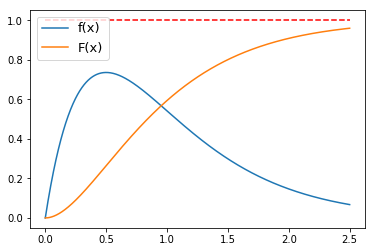

In [9]:
# Densidad de probabilidad - GAMMA
x = np.linspace(0, 2.5, 1000)
y = dens_func(x, 0, dist_params)
plt.plot(x[x>=0], y, label="f(x)")

# Distribucion de probabilidad
y = dist_func(x, 0, dist_params)
plt.plot(x[x>=0], y, label="F(x)")

plt.hlines(y=1.0, xmin=0, xmax=2.5, linestyles="--", color="r")
plt.legend(loc="best", fontsize=13)
plt.show()

# Condición de intersección
---

Las curvas $q(\pi, \kappa)$ y $h(\pi, \kappa)$ deberían intersectarse únicamente cuando:

$$q\left(\pi = \frac{1}{\eta\beta\rho\sigma}\left\{ \int_0^c y \ f(y) dy + c[1-F(c)]-p  \right\}, 0\right) > 0$$

En esta parte, verificamos si la condición se cumple o no. Primero, definimos la función $y \ f(y)$ que va dentro de la integral:
$$\int_0^c y \ f(y) dy$$
A la función $y \ f(y)$ la llamamos `cond_func()`.

In [10]:
def cond_func(xx, y, param_dict):
    return xx*dens_func(xx, y, param_dict)

Una vez definida esta integral, podemos calcular el valor de $\pi$:
$$\pi = \frac{1}{\eta\beta\rho\sigma}\left\{ \int_0^c y \ f(y) dy + c[1-F(c)]-p  \right\}$$

In [11]:
# Se calcula el valor numerico de pi segun lo especifica la condicion
x = np.linspace(0.0001, c)

# Calculamos el coeficiente que multiplica a los terminos dentro del corchete
con_coef = 1/(numerical_params["rho"]*numerical_params["eta"]*numerical_params["beta"]*numerical_params["sig"])

# Aplicamos la funcion RK4 para encontrar el valor de pi '
'''numerical_params["lamb"] *'''
pi_cond = con_coef*( numerical_params["lamb"]*(RK4(cond_func, 0.001, c, 100, 0.3, dist_params) + c*(1-dist_func(c, 0, dist_params)) ) - p)

Diferencia f(x+dx) - f(x):  -0.005943051149040035


In [12]:
numerical_params

{'C': 5.0,
 'M': 5.0,
 'alph': 0.5,
 'beta': 10,
 'c': 2,
 'eta': 7.0,
 'lamb': 7.0,
 'mu': 0.09,
 'p': 0.9,
 'rho': 0.4,
 'sig': 0.3}

In [13]:
# Revisamos el valor de pi_cond

pi_cond

0.6804013800813079

Para la distribución gamma, obtuvimos un valor de `pi_cond` ($\pi_h$) igual a `LO QUE HAYA DADO`

Una vez calculado el valor $\pi_h$, podemos insertarlo en la función $q(\pi_h, 0)$. De esta manera, sabremos si las curvas de nivel se intersectan si 
$$q(\pi_h, 0) > 0$$

**Ahora:** La función $q(\pi, \kappa)$ es:
$$q(\pi, \kappa) = \mu-\eta\sigma\left[ \sigma\pi-\rho\beta\kappa \right] + \int_{0}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-M|z|}}{|z|^{1+\alpha}}dz $$

Por lo tanto, debemos comenzar definiendo la función `q_integ` de la forma: $$ \frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz $$
La cual va dentro del término integral de la función $q(\pi, \kappa)$

In [14]:
# Definimos el termino de la integral de la funcion q

def q_integ(zz, y, param_dict):
    num = param_dict["C"]*np.exp(-1*param_dict["M"]*abs(zz))*(np.exp(zz)-1)
    den = np.float_power(1+(pi_cond * (np.exp(zz)-1) ), param_dict["eta"]) * np.float_power(abs(zz), 1+param_dict["alph"])
    return num/den

In [15]:
numerical_params

{'C': 5.0,
 'M': 5.0,
 'alph': 0.5,
 'beta': 10,
 'c': 2,
 'eta': 7.0,
 'lamb': 7.0,
 'mu': 0.09,
 'p': 0.9,
 'rho': 0.4,
 'sig': 0.3}

### Visualización de q_integ

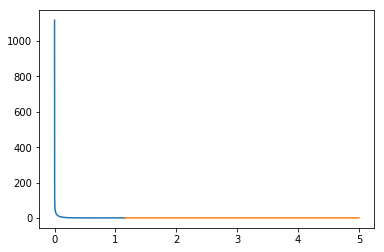

In [16]:
# AHORA: Visualizamos la funcion q_integ entre los limites definidios abajo:

# Limites de la integral para x<0
#lim_inf = -5
#lim_sup = -0.0001

lim_inf = 0.0001
lim_sup = 1.16

# Limites de la integral para x>0
#Lim_inf = 0.0001
#Lim_sup = 1.174#0.053 #0.2878 # Weibull
Lim_inf = 1.16
Lim_sup = 5#0.053 #0.2878 # Weibull

x = np.linspace(0.2*lim_inf, lim_sup, 100000)
plt.plot(x, q_integ(x, 0, numerical_params))
#plt.show()

x = np.linspace(Lim_inf, Lim_sup, 1000000)
plt.plot(x, q_integ(x, 0, numerical_params))

plt.show()

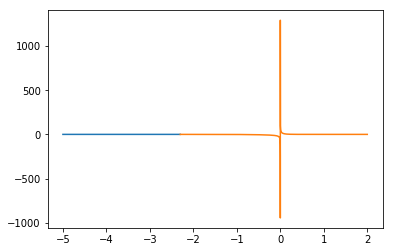

In [17]:
# Nuevamente graficamos la funcion para mas valores de x

# Limites de la integral para x<0
lim_inf = -5.0
lim_sup = -2.301
# Limites de la integral para x>0
Lim_inf = -2.301
Lim_sup = 2.0 # 0.2878

x = np.linspace(lim_inf, lim_sup, 100000)
plt.plot(x, q_integ(x, 0, numerical_params))

x = np.linspace(Lim_inf, Lim_sup, 100000)
plt.plot(x, q_integ(x, 0, numerical_params))
plt.show()

#RK1  = RK4(q_integ, lim_inf , lim_sup, 100000, 1e25, all_params)

Es claro que hay una discontinuidad en el cero, y más allá del 0.053, las soluciones son complejas. Sin embargo, como la función es continua a ambos lados del cero, podemos separa la integral para los términos menores a cero y los términos mayores a cero.

## Evaluación de la condición
---
Ya que $\pi_h>0$, definimos la función `q_func` como la función:
$$q(\pi, \kappa) = \mu-\eta\sigma\left[ \sigma\pi-\rho\beta\kappa \right] + \int_{0}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz $$

Y evaluamos:

In [18]:
# Limites de la integral para x<0
#lim_inf = -5
#lim_sup = -0.0001
# Limites de la integral para x>0
Lim_inf = 0.0001
Lim_sup = 10 # EXPONENECIAL: 0.053 # 0.2878 

# Ahora definimos la funcion q

def q_func(pp, kk, param_dict):
    fix  = param_dict["mu"]-param_dict["eta"]*param_dict["sig"]*(param_dict["sig"]*pp - param_dict["rho"]*param_dict["beta"]*kk)
    
    # Evaluamos la integral sobre los reales positivos
    #RK1  = RK4(q_integ, lim_inf , lim_sup, 100000, 1e22, param_dict)
    
    RK2  = RK4(q_integ, Lim_inf,  Lim_sup, 100000, 500e20, param_dict)
    print("RK2: %.4f"%(RK2))
    return fix + RK2 #+ RK1

In [19]:
# Calculamos el valor numerico de la funcion q segun la condicion

cond_test = q_func(pi_cond, 0, numerical_params)

Diferencia f(x+dx) - f(x):  -4.4169810456399964e-51
RK2: 2.7948


In [20]:
# Revisamos el valor numerico de la condicion a ver si da positivo o negativo

cond_test

2.456192518257154

# Resultado: condición
---
La condición $q(\pi_c, 0) = -1.636078 \cdot 10^{20}$. Es decir, nos da muy negativa. Por lo tanto, para los parámetros escogidos, las curvas de nivel no deberían intersectarse.

# Curvas de nivel
---
La condición:

$$q\left(\pi = \frac{1}{\eta\beta\rho\sigma}\left\{ \int_0^c y \ f(y) dy + c[1-F(c)]-p  \right\}, 0\right) > 0$$

Es *suficiente*, mas no necesaria, para que las carvas de nivel $q(\pi, \kappa) = 0$ y $h(\pi, \kappa) = 0$ se intercepten. 

La función $q(\pi, \kappa)$ se define como: $$q(\pi, \kappa) = \mu-\eta\sigma\left[ \sigma\pi-\rho\beta\kappa \right] + \int_{0}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz $$

La función $h(\pi, \kappa)$ se define como: $$h(\pi, \kappa) = p+\eta\beta\left[ \rho\sigma\pi-\beta\kappa \right] - \lambda\left\{\int_{0}^{c}\frac{y \ f(y)}{\left[1-\kappa y\right]^{\eta}} dy + \frac{c[1-F(c)]}{[1-\kappa c]^{\eta}}\right\} $$

---

## Tres casos de interés

 1. $\pi \geq 0$ y la función $q(\pi, \kappa)$ como se define arriba.
 2. $\pi \leq 1$ y la función $q(\pi, \kappa)$ integrada entre $(-\infty, 0]$
 3. $\pi \in [0, 1]$ y la función $q(\pi, \kappa)$ integrada entre $(-\infty, +\infty)$


 * Por lo tanto, para la primera ecuación, evaluaremos valores de $\pi$ y obtendremos el $\kappa$ dado por esta ecuación. Iterando sobre múltiples $\pi$, tendremos una curva de nivel donde la ecuación $q(\pi, \kappa)$ sea cero.
 
 * Para la segunda ecuación tendremos lo converso. Iterando valores de $\kappa$ obtendremos un conjunto de valores que harán que la función $h(\pi, \kappa)$ sea cero
 
Graficando los resultados obtenidos, veremos si las curvas llegan a intersectarse.
 
## Caso 1

 * $\pi \geq 0$

La función $q(\pi, \kappa)$ se hará cero cuando:

$$\kappa = \frac{1}{\eta\beta\rho\sigma}\left\{ \eta\pi\sigma^2-\mu-\int_{0}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-Mz}}{|z|^{1+\alpha}}dz \right\} \ \in [0, 1/c)$$

Mientras tanto, $h(\pi, \kappa)$ se hará cero cuando:

$$\pi = \frac{\lambda}{\eta\beta\rho\sigma}\left\{ \int_0^c\frac{y\ f(y)}{\left[ 1-\kappa y \right]^{\eta}}dy +\frac{c[1-F(y)]}{\left[ 1-\kappa c \right]^{\eta}}\right\} + \frac{\beta\kappa}{\rho\sigma}-\frac{p}{\eta\beta\rho\sigma} \ \in (-\infty, +\infty)$$

# Primera curva de nivel
---
# TENER CUIDADO CON LOS LIMITES
Comenzamos evaluando la función
$$\kappa = \frac{1}{\eta\beta\rho\sigma}\left\{ \eta\pi\sigma^2-\mu-\int_{0}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-M|z|}}{|z|^{1+\alpha}}dz \right\} \ \in [0, 1/c)$$

Nuevamente, debemos comenzar definiendo la función que va dentro de la integral. En este caso es la función `kappa_int()` definida como:
$$\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-M|z|}}{|z|^{1+\alpha}}$$

Podemos ver que en su definición, el tercer argumento que acepta esta función (`pi_par`) será el valor de $\pi$ que pondremos a iterar para poder sacar la curva de nivel.

In [21]:
def kappa_int(xx, y, pi_par):
    num = (np.exp(xx)-1) * all_params["C"]*np.exp(-1*all_params["M"]*abs(xx)) #*(np.exp(xx)-1)
    den = np.float_power(1+(pi_par*(np.exp(xx)-1)), eta[K]) * np.float_power(abs(xx), 1+all_params["alph"])
    
    return num/den

### Visualización
Vemos cómo se ve la función `kappa_int()` para un valor de $\pi=0.21$ arbitrario

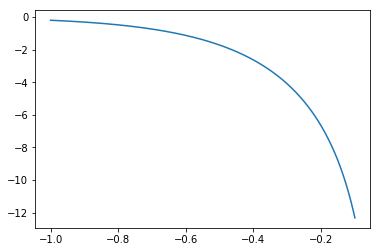

In [22]:
x = np.linspace(-1, -0.1, 2000)
y = kappa_int(x, 0.0, 0.44)
plt.plot(x, y)
plt.show()

In [143]:
for i in range(1, len(y)):
    print(y[i]-y[i-1])

-1.5564199588550183e-15
-1.577326829196884e-15
-1.5985144353553353e-15
-1.619986545859245e-15
-1.6417469798139212e-15
-1.663799607573721e-15
-1.6861483514380156e-15
-1.7087971863437466e-15
-1.731750140567803e-15
-1.7550112964532016e-15
-1.77858479112343e-15
-1.8024748172238235e-15
-1.8266856236655184e-15
-1.8512215163791733e-15
-1.87608685908101e-15
-1.9012860740467307e-15
-1.92682364290212e-15
-1.952704107409054e-15
-1.9789320702845007e-15
-2.0055121960121024e-15
-2.0324492116668547e-15
-2.0597479077664973e-15
-2.0874131391110634e-15
-2.115449825649945e-15
-2.1438629533611765e-15
-2.172657575125846e-15
-2.2018388116375693e-15
-2.2314118523039883e-15
-2.2613819561729314e-15
-2.2917544528658183e-15
-2.3225347435235366e-15
-2.3537283017680945e-15
-2.3853406746718213e-15
-2.417377483749566e-15
-2.4498444259448096e-15
-2.482747274657105e-15
-2.5160918807588604e-15
-2.5498841736315618e-15
-2.584130162231935e-15
-2.618835936145484e-15
-2.6540076666742377e-15
-2.6896516079395367e-15
-2.725774

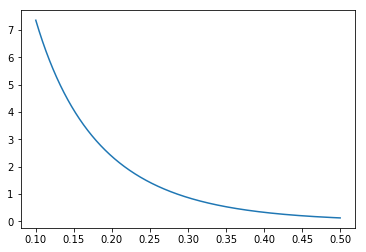

In [23]:
x = np.linspace(0.1, 0.5, 2000)
y = kappa_int(x, 0.0, 0.44)
plt.plot(x, y)
plt.show()

In [51]:
for i in range(1, len(y)):
    print(y[i]-y[i-1])

-0.005237383623177161
-0.005215534425546231
-0.005193782342157061
-0.005172126904834151
-0.0051505676479013385
-0.005129104108154481
-0.005107735824859461
-0.005086462339730202
-0.005065283196915127
-0.005044197942973838
-0.005023206126888224
-0.005002307300019382
-0.00498150101610495
-0.004960786831254227
-0.004940164303918193
-0.004919632994881296
-0.004899192467263225
-0.004878842286470286
-0.004858582020216051
-0.004838411238494933
-0.004818329513559316
-0.004798336419924887
-0.0047784315343391
-0.004758614435781405
-0.004738884705443702
-0.004719241926719686
-0.004699685685190413
-0.004680215568606316
-0.004660831166890755
-0.004641532072109156
-0.004622317878462789
-0.004603188182285667
-0.004584142582016115
-0.004565180678191005
-0.004546302073444419
-0.004527506372474344
-0.0045087931820471105
-0.004490162110985185
-0.004471612770135858
-0.004453144772392115
-0.004434757732642236
-0.004416451267800436
-0.004398224996755351
-0.004380078540377141
-0.004362011521522824
-0.00434402

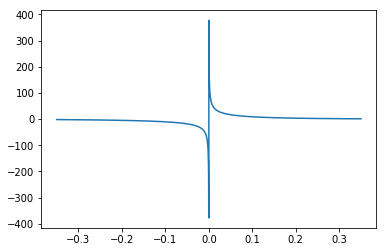

In [24]:
# Evaluamos como se ve cuando pasa por x=0

x = np.linspace(-0.35, 0.35, 2000)
y = kappa_int(x, 0.0, 0.21)
plt.plot(x, y)
plt.show()

In [25]:
# Integramos la funcion desde -50 hasta 0.1

erer = %time RK4(kappa_int, -50, 0.1, 10000, 1e216, 0.21)

Diferencia f(x+dx) - f(x):  -0.5420367072336187
CPU times: user 368 ms, sys: 0 ns, total: 368 ms
Wall time: 366 ms


**Ahora:** Podemos calcular finalmente las curvas de nivel. La función `kappa_level()` se define como:
$$\kappa = \frac{1}{\eta\beta\rho\sigma}\left\{ \eta\pi\sigma^2-\mu-\int_{0}^{+\infty}\frac{e^z-1}{\left[1+\pi(e^z-1)\right]^{\eta}} \cdot \frac{Ce^{-M|z|}}{|z|^{1+\alpha}}dz \right\} \ \in [0, 1/c)$$

In [167]:
Lim_inf = 0.00001
Lim_sup = 1.0

print(Lim_inf, Lim_sup)
numerical_params

1e-05 1.0


{'C': 5.0,
 'M': 5.0,
 'alph': 0.5,
 'beta': 10,
 'c': 2,
 'eta': 7.0,
 'lamb': 8.0,
 'mu': 0.09,
 'p': 50,
 'rho': 0.8,
 'sig': 0.3}

In [209]:
#def kappa_level(zz, y, param_dict):
def kappa_level(a, b, N, param_dict):
    # Definimos los pi que vamos a iterar
    pi_it = np.linspace(a, b, N)
    
    coef = 1./(param_dict["eta"]*param_dict["beta"]*param_dict["rho"]*param_dict["sig"])
    kapp = []
    
    for i in range(N):
        #RKint = RK4(kappa_int, lim_inf, lim_sup, 1000, 1e129, pi_it[i])
        RKint = RK4(kappa_int, Lim_inf, Lim_sup, 1000, 1e129, pi_it[i])
        corch = param_dict["eta"]*pi_it[i]*param_dict["sig"]*param_dict["sig"] - param_dict["mu"] - RKint
        kapp.append(coef*corch)
        print(kapp[i])
    
    kapp = np.array(kapp)
    return pi_it, kapp

# Aplicación de los casos
---
## Caso 1:
Integramos desde 0 hasta $\infty$ para valores de $\pi$:
$$\pi \geq 0$$ $$z \in [0, \infty)$$

In [210]:
numerical_params

{'C': 5.0,
 'M': 5.0,
 'alph': 0.5,
 'beta': 10,
 'c': 2,
 'eta': 7.0,
 'lamb': 8.0,
 'mu': 0.09,
 'p': 5,
 'rho': 0.4,
 'sig': 0.3}

In [211]:
# Limites de la integral para x>0
Lim_inf = 0.00001
Lim_sup = 0.5

# ORIGINAL
#p_lvl1, k_lvl1 = kappa_level(1e-4, 5., 2000, all_params)
p_lvl1, k_lvl1 = kappa_level(1e-4, 10., 2000, all_params)

Diferencia f(x+dx) - f(x):  -0.00206380978751608
-0.49487041832179524
Diferencia f(x+dx) - f(x):  -0.0020388620102315125
-0.4927895254070289
Diferencia f(x+dx) - f(x):  -0.0020140104534245307
-0.49072679497159166
Diferencia f(x+dx) - f(x):  -0.0019892677523923874
-0.48868192318905157
Diferencia f(x+dx) - f(x):  -0.0019646456565773907
-0.4866546128612194
Diferencia f(x+dx) - f(x):  -0.0019401550771455112
-0.48464457324425575
Diferencia f(x+dx) - f(x):  -0.0019158061321293829
-0.4826515198800232
Diferencia f(x+dx) - f(x):  -0.0018916081892718095
-0.48067517443251107
Diferencia f(x+dx) - f(x):  -0.0018675699066732498
-0.4787152645291852
Diferencia f(x+dx) - f(x):  -0.0018436992713782852
-0.4767715236070699
Diferencia f(x+dx) - f(x):  -0.0018200036359793392
-0.4748436907634078
Diferencia f(x+dx) - f(x):  -0.0017964897533676583
-0.47293151061075533
Diferencia f(x+dx) - f(x):  -0.0017731638096945002
-0.47103473313636435
Diferencia f(x+dx) - f(x):  -0.0017500314556709862
-0.46915311356569145


-0.325205198042939
Diferencia f(x+dx) - f(x):  -0.0004018005869860508
-0.3241600922732107
Diferencia f(x+dx) - f(x):  -0.0003964242490098191
-0.3231189328063828
Diferencia f(x+dx) - f(x):  -0.0003911263111235075
-0.3220816806752258
Diferencia f(x+dx) - f(x):  -0.0003859055810552514
-0.32104829744289304
Diferencia f(x+dx) - f(x):  -0.0003807608839879323
-0.3200187451938753
Diferencia f(x+dx) - f(x):  -0.00037569106236895466
-0.31899298652515123
Diferencia f(x+dx) - f(x):  -0.0003706949757198569
-0.3179709845374923
Diferencia f(x+dx) - f(x):  -0.0003657715004427159
-0.3169527028269625
Diferencia f(x+dx) - f(x):  -0.0003609195296274126
-0.31593810547658113
Diferencia f(x+dx) - f(x):  -0.0003561379728559827
-0.3149271570481528
Diferencia f(x+dx) - f(x):  -0.0003514257560076617
-0.3139198225742595
Diferencia f(x+dx) - f(x):  -0.0003467818210624446
-0.31291606755041296
Diferencia f(x+dx) - f(x):  -0.00034220512590481256
-0.31191585792735954
Diferencia f(x+dx) - f(x):  -0.0003376946441272302


-0.2246812040703995
Diferencia f(x+dx) - f(x):  -9.683395795774367e-05
-0.2239209898928299
Diferencia f(x+dx) - f(x):  -9.572820545840702e-05
-0.2231623219153315
Diferencia f(x+dx) - f(x):  -9.46366419700053e-05
-0.22240518960437158
Diferencia f(x+dx) - f(x):  -9.355906699548729e-05
-0.22164958252731912
Diferencia f(x+dx) - f(x):  -9.249528309789555e-05
-0.22089549035120937
Diferencia f(x+dx) - f(x):  -9.144509585084712e-05
-0.2201429028415164
Diferencia f(x+dx) - f(x):  -9.040831379009129e-05
-0.21939180986096368
Diferencia f(x+dx) - f(x):  -8.938474836560004e-05
-0.2186422013683375
Diferencia f(x+dx) - f(x):  -8.83742138948606e-05
-0.21789406741732478
Diferencia f(x+dx) - f(x):  -8.737652751645772e-05
-0.21714739815535883
Diferencia f(x+dx) - f(x):  -8.639150914478699e-05
-0.21640218382249637
Diferencia f(x+dx) - f(x):  -8.541898142537183e-05
-0.2156584147503013
Diferencia f(x+dx) - f(x):  -8.44587696909177e-05
-0.21491608136074075
Diferencia f(x+dx) - f(x):  -8.351070191823032e-05
-

-0.14155347525564255
Diferencia f(x+dx) - f(x):  -2.694964831044533e-05
-0.14092515575524203
Diferencia f(x+dx) - f(x):  -2.6688978568494004e-05
-0.1402975946078754
Diferencia f(x+dx) - f(x):  -2.643116543454664e-05
-0.13967078796228252
Diferencia f(x+dx) - f(x):  -2.617617404364423e-05
-0.13904473199485218
Diferencia f(x+dx) - f(x):  -2.592396999802956e-05
-0.13841942290936302
Diferencia f(x+dx) - f(x):  -2.5674519360373987e-05
-0.1377948569367307
Diferencia f(x+dx) - f(x):  -2.5427788647075338e-05
-0.13717103033475775
Diferencia f(x+dx) - f(x):  -2.5183744821696743e-05
-0.13654793938788648
Diferencia f(x+dx) - f(x):  -2.494235528849786e-05
-0.1359255804069523
Diferencia f(x+dx) - f(x):  -2.4703587886025936e-05
-0.13530394972894458
Diferencia f(x+dx) - f(x):  -2.4467410880863426e-05
-0.13468304371676754
Diferencia f(x+dx) - f(x):  -2.4233792961454118e-05
-0.13406285875899998
Diferencia f(x+dx) - f(x):  -2.4002703231993e-05
-0.13344339126966542
Diferencia f(x+dx) - f(x):  -2.3774111206

Diferencia f(x+dx) - f(x):  -9.513145533770421e-06
-0.07291447950174136
Diferencia f(x+dx) - f(x):  -9.433246885537719e-06
-0.07235398718534397
Diferencia f(x+dx) - f(x):  -9.354110890874437e-06
-0.07179394190145347
Diferencia f(x+dx) - f(x):  -9.275729410644293e-06
-0.07123434182719408
Diferencia f(x+dx) - f(x):  -9.198094401557293e-06
-0.07067518515019794
Diferencia f(x+dx) - f(x):  -9.121197914939167e-06
-0.07011647006852871
Diferencia f(x+dx) - f(x):  -9.045032095507735e-06
-0.06955819479060223
Diferencia f(x+dx) - f(x):  -8.96958918018137e-06
-0.06900035753511202
Diferencia f(x+dx) - f(x):  -8.894861496900252e-06
-0.06844295653094819
Diferencia f(x+dx) - f(x):  -8.820841463454132e-06
-0.06788599001712668
Diferencia f(x+dx) - f(x):  -8.74752158634023e-06
-0.06732945624271278
Diferencia f(x+dx) - f(x):  -8.674894459628508e-06
-0.06677335346674614
Diferencia f(x+dx) - f(x):  -8.602952763840828e-06
-0.0662176799581686
Diferencia f(x+dx) - f(x):  -8.5316892648533e-06
-0.065662433995751

-0.007891450804602962
Diferencia f(x+dx) - f(x):  -3.633472558049939e-06
-0.007374293683878477
Diferencia f(x+dx) - f(x):  -3.6067553688275654e-06
-0.006857421602298212
Diferencia f(x+dx) - f(x):  -3.58026182499478e-06
-0.006340833595184833
Diferencia f(x+dx) - f(x):  -3.5539898292957827e-06
-0.0058245287024731645
Diferencia f(x+dx) - f(x):  -3.5279373062252245e-06
-0.005308505968677781
Diferencia f(x+dx) - f(x):  -3.502102201785346e-06
-0.004792764442870087
Diferencia f(x+dx) - f(x):  -3.4764824832386157e-06
-0.004277303178645513
Diferencia f(x+dx) - f(x):  -3.4510761388679067e-06
-0.003762121234096186
Diferencia f(x+dx) - f(x):  -3.4258811777393254e-06
-0.003247217671785971
Diferencia f(x+dx) - f(x):  -3.4008956294674826e-06
-0.0027325915587209488
Diferencia f(x+dx) - f(x):  -3.3761175439819564e-06
-0.002218241966322582
Diferencia f(x+dx) - f(x):  -3.351544991297983e-06
-0.0017041679704016528
Diferencia f(x+dx) - f(x):  -3.327176061292407e-06
-0.0011903686511289494
Diferencia f(x+dx)

0.04894327647035264
Diferencia f(x+dx) - f(x):  -1.6503875390719183e-06
0.04943340657485063
Diferencia f(x+dx) - f(x):  -1.639517293831606e-06
0.04992333698472227
Diferencia f(x+dx) - f(x):  -1.6287286292302665e-06
0.05041306828358857
Diferencia f(x+dx) - f(x):  -1.6180208586632095e-06
0.05090260105266192
Diferencia f(x+dx) - f(x):  -1.6073933019248687e-06
0.05139193587076339
Diferencia f(x+dx) - f(x):  -1.5968452851434513e-06
0.05188107331433314
Diferencia f(x+dx) - f(x):  -1.5863761407159402e-06
0.052370013957444714
Diferencia f(x+dx) - f(x):  -1.5759852072439633e-06
0.052858758371815334
Diferencia f(x+dx) - f(x):  -1.5656718294716418e-06
0.05334730712682021
Diferencia f(x+dx) - f(x):  -1.55543535822211e-06
0.05383566078950461
Diferencia f(x+dx) - f(x):  -1.5452751503353633e-06
0.054323819924595555
Diferencia f(x+dx) - f(x):  -1.5351905686087632e-06
0.054811785094514696
Diferencia f(x+dx) - f(x):  -1.5251809817348305e-06
0.05529955685939119
Diferencia f(x+dx) - f(x):  -1.515245764242

0.10459893827374468
Diferencia f(x+dx) - f(x):  -7.966982610399282e-07
0.10506926682247679
Diferencia f(x+dx) - f(x):  -7.919605485482665e-07
0.1055394500687172
Diferencia f(x+dx) - f(x):  -7.872549579382703e-07
0.10600948838515452
Diferencia f(x+dx) - f(x):  -7.825812448117287e-07
0.10647938214313164
Diferencia f(x+dx) - f(x):  -7.779391668309298e-07
0.10694913171264876
Diferencia f(x+dx) - f(x):  -7.733284837001481e-07
0.10741873746237256
Diferencia f(x+dx) - f(x):  -7.687489571458442e-07
0.1078881997596437
Diferencia f(x+dx) - f(x):  -7.642003508990332e-07
0.10835751897047816
Diferencia f(x+dx) - f(x):  -7.596824306759447e-07
0.1088266954595778
Diferencia f(x+dx) - f(x):  -7.551949641602154e-07
0.10929572959033414
Diferencia f(x+dx) - f(x):  -7.507377209845114e-07
0.10976462172483539
Diferencia f(x+dx) - f(x):  -7.463104727130457e-07
0.11023337222387283
Diferencia f(x+dx) - f(x):  -7.419129928228351e-07
0.11070198144694454
Diferencia f(x+dx) - f(x):  -7.375450566874232e-07
0.1111704

0.1619158180469308
Diferencia f(x+dx) - f(x):  -3.941524653922434e-07
0.16237060538429274
Diferencia f(x+dx) - f(x):  -3.920297602060782e-07
0.162825285021831
Diferencia f(x+dx) - f(x):  -3.8992009462248675e-07
0.16327985720394594
Diferencia f(x+dx) - f(x):  -3.878233787098329e-07
0.16373432217425654
Diferencia f(x+dx) - f(x):  -3.857395232236818e-07
0.16418868017560465
Diferencia f(x+dx) - f(x):  -3.836684396020564e-07
0.16464293145005882
Diferencia f(x+dx) - f(x):  -3.8161003995874936e-07
0.16509707623891512
Diferencia f(x+dx) - f(x):  -3.795642370782611e-07
0.1655511147827035
Diferencia f(x+dx) - f(x):  -3.775309444102026e-07
0.16600504732118737
Diferencia f(x+dx) - f(x):  -3.7551007606332563e-07
0.16645887409336932
Diferencia f(x+dx) - f(x):  -3.7350154680031844e-07
0.16691259533749475
Diferencia f(x+dx) - f(x):  -3.715052720322629e-07
0.16736621129105073
Diferencia f(x+dx) - f(x):  -3.6952116781314553e-07
0.16781972219077462
Diferencia f(x+dx) - f(x):  -3.675491508348095e-07
0.168

0.21622751873934293
Diferencia f(x+dx) - f(x):  -2.1094311835263325e-07
0.21667084838778736
Diferencia f(x+dx) - f(x):  -2.0990309089164732e-07
0.21711409504739856
Diferencia f(x+dx) - f(x):  -2.0886891411792935e-07
0.21755725888751662
Diferencia f(x+dx) - f(x):  -2.0784055106663288e-07
0.21800034007699812
Diferencia f(x+dx) - f(x):  -2.0681796503216112e-07
0.21844333878421515
Diferencia f(x+dx) - f(x):  -2.0580111956583933e-07
0.21888625517705682
Diferencia f(x+dx) - f(x):  -2.0478997847408857e-07
0.21932908942293106
Diferencia f(x+dx) - f(x):  -2.0378450581645048e-07
0.2197718416887691
Diferencia f(x+dx) - f(x):  -2.0278466590358484e-07
0.22021451214102247
Diferencia f(x+dx) - f(x):  -2.0179042329548068e-07
0.22065710094566973
Diferencia f(x+dx) - f(x):  -2.008017427994403e-07
0.2210996082682146
Diferencia f(x+dx) - f(x):  -1.9981858946805322e-07
0.2215420342736877
Diferencia f(x+dx) - f(x):  -1.9884092859772566e-07
0.22198437912665295
Diferencia f(x+dx) - f(x):  -1.9786872572619374e

Diferencia f(x+dx) - f(x):  -1.2042778853987778e-07
0.26844389482346814
Diferencia f(x+dx) - f(x):  -1.1987931201800774e-07
0.26887841761522907
Diferencia f(x+dx) - f(x):  -1.1933368631302894e-07
0.2693128745928458
Diferencia f(x+dx) - f(x):  -1.1879089477921084e-07
0.26974726587853154
Diferencia f(x+dx) - f(x):  -1.1825092087863664e-07
0.27018159159418204
Diferencia f(x+dx) - f(x):  -1.1771374818047652e-07
0.27061585186137377
Diferencia f(x+dx) - f(x):  -1.171793603601762e-07
0.27105004680136796
Diferencia f(x+dx) - f(x):  -1.1664774119873695e-07
0.2714841765351083
Diferencia f(x+dx) - f(x):  -1.1611887458197358e-07
0.2719182411832261
Diferencia f(x+dx) - f(x):  -1.1559274449977754e-07
0.2723522408660356
Diferencia f(x+dx) - f(x):  -1.1506933504526312e-07
0.2727861757035417
Diferencia f(x+dx) - f(x):  -1.1454863041424902e-07
0.2732200458154364
Diferencia f(x+dx) - f(x):  -1.140306149043114e-07
0.27365385132110087
Diferencia f(x+dx) - f(x):  -1.1351527291419776e-07
0.2740875923396071
D

Diferencia f(x+dx) - f(x):  -6.956235410142601e-08
0.32228515895778004
Diferencia f(x+dx) - f(x):  -6.926924531046854e-08
0.3227123102440847
Diferencia f(x+dx) - f(x):  -6.897754627146492e-08
0.32313940882373243
Diferencia f(x+dx) - f(x):  -6.868724936599668e-08
0.32356645478616225
Diferencia f(x+dx) - f(x):  -6.83983470213953e-08
0.32399344822060305
Diferencia f(x+dx) - f(x):  -6.811083171031954e-08
0.324420389216067
Diferencia f(x+dx) - f(x):  -6.78246959505496e-08
0.32484727786136114
Diferencia f(x+dx) - f(x):  -6.75399323046373e-08
0.3252741142450734
Diferencia f(x+dx) - f(x):  -6.725653337964774e-08
0.32570089845558775
Diferencia f(x+dx) - f(x):  -6.697449182683149e-08
0.32612763058107336
Diferencia f(x+dx) - f(x):  -6.669380034135861e-08
0.32655431070949287
Diferencia f(x+dx) - f(x):  -6.641445166202054e-08
0.3269809389285991
Diferencia f(x+dx) - f(x):  -6.61364385709446e-08
0.3274075153259374
Diferencia f(x+dx) - f(x):  -6.585975389331365e-08
0.3278340399888454
Diferencia f(x+dx

Diferencia f(x+dx) - f(x):  -4.314771509719791e-08
0.3719259801359562
Diferencia f(x+dx) - f(x):  -4.297781750627302e-08
0.37234752070033295
Diferencia f(x+dx) - f(x):  -4.2808683636101505e-08
0.37276901772958565
Diferencia f(x+dx) - f(x):  -4.264030962878456e-08
0.37319047129208555
Diferencia f(x+dx) - f(x):  -4.247269164805999e-08
0.3736118814560567
Diferencia f(x+dx) - f(x):  -4.230582587916245e-08
0.3740332482895698
Diferencia f(x+dx) - f(x):  -4.2139708528676916e-08
0.3744545718605466
Diferencia f(x+dx) - f(x):  -4.197433582443787e-08
0.37487585223675884
Diferencia f(x+dx) - f(x):  -4.18097040153726e-08
0.3752970894858303
Diferencia f(x+dx) - f(x):  -4.164580937137672e-08
0.3757182836752356
Diferencia f(x+dx) - f(x):  -4.1482648183188764e-08
0.3761394348723004
Diferencia f(x+dx) - f(x):  -4.132021676227755e-08
0.3765605431442031
Diferencia f(x+dx) - f(x):  -4.115851144066686e-08
0.37698160855797547
Diferencia f(x+dx) - f(x):  -4.0997528570879496e-08
0.3774026311805002
Diferencia f

0.42263481224839966
Diferencia f(x+dx) - f(x):  -2.7083807106339846e-08
0.42305154139194034
Diferencia f(x+dx) - f(x):  -2.6983985914714424e-08
0.42346823429062663
Diferencia f(x+dx) - f(x):  -2.6884584775307142e-08
0.42388489099731375
Diferencia f(x+dx) - f(x):  -2.6785601701550877e-08
0.4243015115647509
Diferencia f(x+dx) - f(x):  -2.6687034717305904e-08
0.4247180960455779
Diferencia f(x+dx) - f(x):  -2.658888185679383e-08
0.42513464449232846
Diferencia f(x+dx) - f(x):  -2.6491141164559897e-08
0.42555115695742873
Diferencia f(x+dx) - f(x):  -2.6393810695383626e-08
0.42596763349319505
Diferencia f(x+dx) - f(x):  -2.6296888514241542e-08
0.42638407415184115
Diferencia f(x+dx) - f(x):  -2.620037269624153e-08
0.42680047898547113
Diferencia f(x+dx) - f(x):  -2.610426132655677e-08
0.42721684804608484
Diferencia f(x+dx) - f(x):  -2.600855250038889e-08
0.4276331813855749
Diferencia f(x+dx) - f(x):  -2.5913244322889185e-08
0.4280494790557281
Diferencia f(x+dx) - f(x):  -2.5818334909109498e-08


Diferencia f(x+dx) - f(x):  -1.7744904028541517e-08
0.4719847682638344
Diferencia f(x+dx) - f(x):  -1.7683316187877514e-08
0.47239752785778366
Diferencia f(x+dx) - f(x):  -1.762197242218846e-08
0.47281025680855815
Diferencia f(x+dx) - f(x):  -1.7560871644272625e-08
0.47322295515791435
Diferencia f(x+dx) - f(x):  -1.7500012772296777e-08
0.47363562294753064
Diferencia f(x+dx) - f(x):  -1.7439394729776272e-08
0.4740482602190052
Diferencia f(x+dx) - f(x):  -1.737901644554075e-08
0.47446086701385587
Diferencia f(x+dx) - f(x):  -1.7318876853715294e-08
0.4748734433735232
Diferencia f(x+dx) - f(x):  -1.725897489368103e-08
0.47528598933936606
Diferencia f(x+dx) - f(x):  -1.719930951005164e-08
0.4756985049526654
Diferencia f(x+dx) - f(x):  -1.7139879652643695e-08
0.4761109902546257
Diferencia f(x+dx) - f(x):  -1.708068427644745e-08
0.47652344528637053
Diferencia f(x+dx) - f(x):  -1.702172234160778e-08
0.4769358700889447
Diferencia f(x+dx) - f(x):  -1.6962992813377167e-08
0.4773482647033174
Difer

Diferencia f(x+dx) - f(x):  -1.183089307382737e-08
0.5213082339267587
Diferencia f(x+dx) - f(x):  -1.1792130720663333e-08
0.5217175935724464
Diferencia f(x+dx) - f(x):  -1.1753513392644314e-08
0.5221269270664567
Diferencia f(x+dx) - f(x):  -1.1715040479851744e-08
0.5225362344422179
Diferencia f(x+dx) - f(x):  -1.1676711375212874e-08
0.5229455157330978
Diferencia f(x+dx) - f(x):  -1.1638525474492094e-08
0.5233547709724078
Diferencia f(x+dx) - f(x):  -1.1600482176267212e-08
0.523764000193396
Diferencia f(x+dx) - f(x):  -1.1562580881921832e-08
0.5241732034292529
Diferencia f(x+dx) - f(x):  -1.1524820995632226e-08
0.5245823807131089
Diferencia f(x+dx) - f(x):  -1.1487201924347643e-08
0.5249915320780355
Diferencia f(x+dx) - f(x):  -1.1449723077776326e-08
0.5254006575570452
Diferencia f(x+dx) - f(x):  -1.1412383868379166e-08
0.5258097571830911
Diferencia f(x+dx) - f(x):  -1.1375183711345558e-08
0.5262188309890671
Diferencia f(x+dx) - f(x):  -1.133812202458599e-08
0.526627879007809
Diferencia

0.5722855859290187
Diferencia f(x+dx) - f(x):  -7.915679638059414e-09
0.5726919178962704
Diferencia f(x+dx) - f(x):  -7.891185776167693e-09
0.573098227466343
Diferencia f(x+dx) - f(x):  -7.86677847017522e-09
0.5735045146661307
Diferencia f(x+dx) - f(x):  -7.84245737623765e-09
0.573910779522486
Diferencia f(x+dx) - f(x):  -7.818222152026303e-09
0.5743170220622112
Diferencia f(x+dx) - f(x):  -7.794072456721058e-09
0.5747232423120685
Diferencia f(x+dx) - f(x):  -7.770007951006237e-09
0.5751294402987712
Diferencia f(x+dx) - f(x):  -7.74602829705884e-09
0.5755356160489915
Diferencia f(x+dx) - f(x):  -7.722133158541566e-09
0.5759417695893524
Diferencia f(x+dx) - f(x):  -7.698322200601328e-09
0.5763479009464355
Diferencia f(x+dx) - f(x):  -7.674595089855698e-09
0.5767540101467767
Diferencia f(x+dx) - f(x):  -7.650951494387192e-09
0.5771600972168675
Diferencia f(x+dx) - f(x):  -7.627391083738612e-09
0.5775661621831537
Diferencia f(x+dx) - f(x):  -7.60391352890489e-09
0.5779722050720388
Diferen

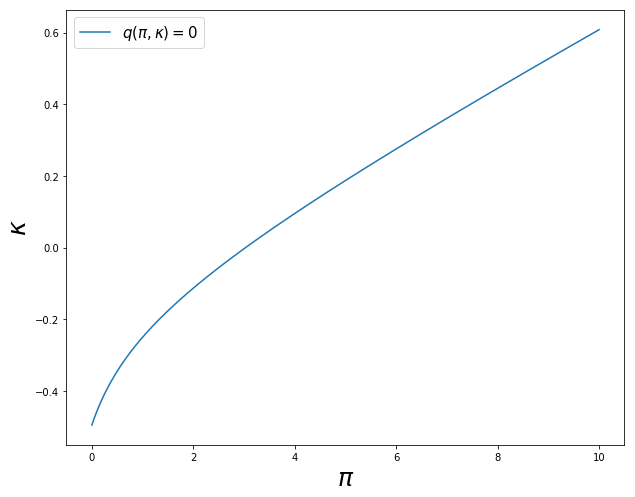

In [212]:
plt.figure(figsize=(10, 8))
plt.plot(p_lvl1, k_lvl1, label=r"$q(\pi, \kappa)=0$")
plt.xlabel(r"$\pi$", fontsize=25)
plt.ylabel(r"$\kappa$", fontsize=25)
plt.legend(loc="best", fontsize=15)
#plt.savefig("q0.pdf", bbox_inches="tight")
plt.show()

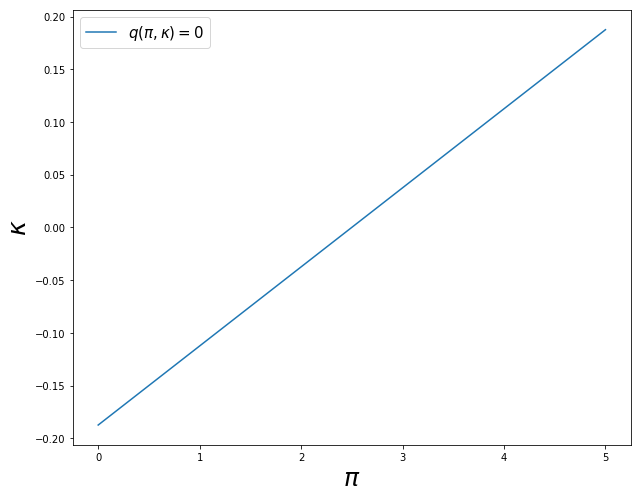

In [69]:
###################################################
# COMPARACION
plt.figure(figsize=(10, 8))
plt.plot(p_lvl1, k_lvl1, label=r"$q(\pi, \kappa)=0$")
plt.xlabel(r"$\pi$", fontsize=25)
plt.ylabel(r"$\kappa$", fontsize=25)
plt.legend(loc="best", fontsize=15)
#plt.savefig("q0.pdf", bbox_inches="tight")
plt.show()

In [70]:
(k_lvl1[-1]-k_lvl1[0])/(p_lvl1[-1]-p_lvl1[0])

0.075

In [72]:
print(p_lvl1[-1], k_lvl1[-1])

5.0 0.1875


In [71]:
(k_lvl1[1]-k_lvl1[0])/(p_lvl1[1]-p_lvl1[0])

0.07500000000000166

## Caso 2:
---
Integramos en el intervalo $(-\infty, 0)$ para valores de $\pi$:
$$\pi \leq 1$$ $$z \in (-\infty, 0]$$

In [213]:
def kappa_level2(a, b, N, param_dict):
    # Definimos los pi que vamos a iterar
    pi_it = np.linspace(a, b, N)
    
    coef = 1./(param_dict["eta"]*param_dict["beta"]*param_dict["rho"]*param_dict["sig"])
    kapp = []
    
    for i in range(N):
        RKint = RK4(kappa_int, lim_inf, lim_sup, 1000, 1e129, pi_it[i])
        #RKint = RK4(kappa_int, Lim_inf, Lim_sup, 1000, 1e129, pi_it[i])
        corch = param_dict["eta"]*pi_it[i]*param_dict["sig"]*param_dict["sig"] - param_dict["mu"] - RKint
        kapp.append(coef*corch)
    
    kapp = np.array(kapp)
    return pi_it, kapp

In [214]:
# Limites de la integral para x<0
lim_inf = -0.5#-10.0
lim_sup = -0.001

p_lvl2, k_lvl2 = kappa_level2(-5.0, 1.0, 2000, all_params)

Diferencia f(x+dx) - f(x):  -18.356808087188625
Diferencia f(x+dx) - f(x):  -18.356319932527157
Diferencia f(x+dx) - f(x):  -18.35583171005956
Diferencia f(x+dx) - f(x):  -18.355343419780894
Diferencia f(x+dx) - f(x):  -18.354855061685384
Diferencia f(x+dx) - f(x):  -18.354366635768045
Diferencia f(x+dx) - f(x):  -18.353878142022992
Diferencia f(x+dx) - f(x):  -18.35338958044541
Diferencia f(x+dx) - f(x):  -18.352900951029184
Diferencia f(x+dx) - f(x):  -18.3524122537694
Diferencia f(x+dx) - f(x):  -18.351923488660304
Diferencia f(x+dx) - f(x):  -18.35143465569685
Diferencia f(x+dx) - f(x):  -18.35094575487345
Diferencia f(x+dx) - f(x):  -18.350456786184452
Diferencia f(x+dx) - f(x):  -18.349967749624824
Diferencia f(x+dx) - f(x):  -18.34947864518894
Diferencia f(x+dx) - f(x):  -18.348989472871466
Diferencia f(x+dx) - f(x):  -18.34850023266675
Diferencia f(x+dx) - f(x):  -18.348010924569778
Diferencia f(x+dx) - f(x):  -18.347521548574633
Diferencia f(x+dx) - f(x):  -18.347032104676416


Diferencia f(x+dx) - f(x):  -18.267842705281936
Diferencia f(x+dx) - f(x):  -18.267342257985206
Diferencia f(x+dx) - f(x):  -18.266841741902198
Diferencia f(x+dx) - f(x):  -18.266341157026716
Diferencia f(x+dx) - f(x):  -18.265840503353758
Diferencia f(x+dx) - f(x):  -18.26533978087761
Diferencia f(x+dx) - f(x):  -18.264838989592974
Diferencia f(x+dx) - f(x):  -18.26433812949429
Diferencia f(x+dx) - f(x):  -18.26383720057588
Diferencia f(x+dx) - f(x):  -18.26333620283279
Diferencia f(x+dx) - f(x):  -18.262835136258758
Diferencia f(x+dx) - f(x):  -18.262334000848966
Diferencia f(x+dx) - f(x):  -18.261832796597403
Diferencia f(x+dx) - f(x):  -18.261331523499067
Diferencia f(x+dx) - f(x):  -18.260830181548016
Diferencia f(x+dx) - f(x):  -18.260328770739193
Diferencia f(x+dx) - f(x):  -18.259827291066856
Diferencia f(x+dx) - f(x):  -18.25932574252556
Diferencia f(x+dx) - f(x):  -18.258824125109825
Diferencia f(x+dx) - f(x):  -18.25832243881395
Diferencia f(x+dx) - f(x):  -18.25782068363281

Diferencia f(x+dx) - f(x):  -18.179212320165306
Diferencia f(x+dx) - f(x):  -18.178699751330058
Diferencia f(x+dx) - f(x):  -18.178187112742293
Diferencia f(x+dx) - f(x):  -18.177674404395788
Diferencia f(x+dx) - f(x):  -18.17716162628554
Diferencia f(x+dx) - f(x):  -18.17664877840555
Diferencia f(x+dx) - f(x):  -18.176135860750676
Diferencia f(x+dx) - f(x):  -18.175622873314992
Diferencia f(x+dx) - f(x):  -18.17510981609334
Diferencia f(x+dx) - f(x):  -18.17459668908006
Diferencia f(x+dx) - f(x):  -18.174083492269148
Diferencia f(x+dx) - f(x):  -18.173570225655567
Diferencia f(x+dx) - f(x):  -18.17305688923335
Diferencia f(x+dx) - f(x):  -18.172543482997312
Diferencia f(x+dx) - f(x):  -18.172030006941526
Diferencia f(x+dx) - f(x):  -18.17151646106086
Diferencia f(x+dx) - f(x):  -18.17100284534945
Diferencia f(x+dx) - f(x):  -18.170489159801818
Diferencia f(x+dx) - f(x):  -18.169975404412455
Diferencia f(x+dx) - f(x):  -18.169461579175476
Diferencia f(x+dx) - f(x):  -18.168947684085765

Diferencia f(x+dx) - f(x):  -18.08582088219771
Diferencia f(x+dx) - f(x):  -18.085295667929557
Diferencia f(x+dx) - f(x):  -18.084770382901397
Diferencia f(x+dx) - f(x):  -18.084245027107997
Diferencia f(x+dx) - f(x):  -18.083719600543674
Diferencia f(x+dx) - f(x):  -18.083194103202317
Diferencia f(x+dx) - f(x):  -18.082668535078795
Diferencia f(x+dx) - f(x):  -18.082142896167156
Diferencia f(x+dx) - f(x):  -18.08161718646204
Diferencia f(x+dx) - f(x):  -18.08109140595755
Diferencia f(x+dx) - f(x):  -18.080565554648345
Diferencia f(x+dx) - f(x):  -18.08003963252861
Diferencia f(x+dx) - f(x):  -18.07951363959276
Diferencia f(x+dx) - f(x):  -18.07898757583493
Diferencia f(x+dx) - f(x):  -18.078461441249885
Diferencia f(x+dx) - f(x):  -18.077935235831788
Diferencia f(x+dx) - f(x):  -18.077408959574782
Diferencia f(x+dx) - f(x):  -18.076882612473696
Diferencia f(x+dx) - f(x):  -18.076356194522546
Diferencia f(x+dx) - f(x):  -18.075829705715847
Diferencia f(x+dx) - f(x):  -18.07530314604774

Diferencia f(x+dx) - f(x):  -17.99228842340365
Diferencia f(x+dx) - f(x):  -17.99175066830422
Diferencia f(x+dx) - f(x):  -17.99121284144772
Diferencia f(x+dx) - f(x):  -17.99067494282764
Diferencia f(x+dx) - f(x):  -17.990136972438833
Diferencia f(x+dx) - f(x):  -17.989598930275505
Diferencia f(x+dx) - f(x):  -17.98906081633163
Diferencia f(x+dx) - f(x):  -17.98852263060195
Diferencia f(x+dx) - f(x):  -17.98798437308038
Diferencia f(x+dx) - f(x):  -17.98744604376172
Diferencia f(x+dx) - f(x):  -17.98690764263958
Diferencia f(x+dx) - f(x):  -17.986369169708766
Diferencia f(x+dx) - f(x):  -17.985830624963228
Diferencia f(x+dx) - f(x):  -17.98529200839762
Diferencia f(x+dx) - f(x):  -17.98475332000602
Diferencia f(x+dx) - f(x):  -17.984214559782572
Diferencia f(x+dx) - f(x):  -17.983675727722044
Diferencia f(x+dx) - f(x):  -17.983136823818086
Diferencia f(x+dx) - f(x):  -17.982597848065467
Diferencia f(x+dx) - f(x):  -17.982058800458148
Diferencia f(x+dx) - f(x):  -17.981519680990786
Dif

Diferencia f(x+dx) - f(x):  -17.895432329846344
Diferencia f(x+dx) - f(x):  -17.894881711639783
Diferencia f(x+dx) - f(x):  -17.89433102065341
Diferencia f(x+dx) - f(x):  -17.8937802568812
Diferencia f(x+dx) - f(x):  -17.893229420317823
Diferencia f(x+dx) - f(x):  -17.89267851095711
Diferencia f(x+dx) - f(x):  -17.892127528793807
Diferencia f(x+dx) - f(x):  -17.891576473821416
Diferencia f(x+dx) - f(x):  -17.89102534603468
Diferencia f(x+dx) - f(x):  -17.89047414542752
Diferencia f(x+dx) - f(x):  -17.88992287199443
Diferencia f(x+dx) - f(x):  -17.88937152572929
Diferencia f(x+dx) - f(x):  -17.888820106626696
Diferencia f(x+dx) - f(x):  -17.888268614680854
Diferencia f(x+dx) - f(x):  -17.887717049885424
Diferencia f(x+dx) - f(x):  -17.887165412235163
Diferencia f(x+dx) - f(x):  -17.886613701723917
Diferencia f(x+dx) - f(x):  -17.88606191834627
Diferencia f(x+dx) - f(x):  -17.885510062096103
Diferencia f(x+dx) - f(x):  -17.884958132967952
Diferencia f(x+dx) - f(x):  -17.88440613095578
Di

Diferencia f(x+dx) - f(x):  -17.79908764341971
Diferencia f(x+dx) - f(x):  -17.798524347921088
Diferencia f(x+dx) - f(x):  -17.797960978635658
Diferencia f(x+dx) - f(x):  -17.797397535558133
Diferencia f(x+dx) - f(x):  -17.79683401868222
Diferencia f(x+dx) - f(x):  -17.796270428002515
Diferencia f(x+dx) - f(x):  -17.795706763512896
Diferencia f(x+dx) - f(x):  -17.79514302520738
Diferencia f(x+dx) - f(x):  -17.794579213080624
Diferencia f(x+dx) - f(x):  -17.794015327126033
Diferencia f(x+dx) - f(x):  -17.793451367338363
Diferencia f(x+dx) - f(x):  -17.792887333711292
Diferencia f(x+dx) - f(x):  -17.792323226239404
Diferencia f(x+dx) - f(x):  -17.791759044916418
Diferencia f(x+dx) - f(x):  -17.79119478973685
Diferencia f(x+dx) - f(x):  -17.790630460694672
Diferencia f(x+dx) - f(x):  -17.790066057784017
Diferencia f(x+dx) - f(x):  -17.789501580999044
Diferencia f(x+dx) - f(x):  -17.788937030333685
Diferencia f(x+dx) - f(x):  -17.788372405782425
Diferencia f(x+dx) - f(x):  -17.787807707339

Diferencia f(x+dx) - f(x):  -17.70053474517364
Diferencia f(x+dx) - f(x):  -17.69995859711878
Diferencia f(x+dx) - f(x):  -17.699382374257652
Diferencia f(x+dx) - f(x):  -17.69880607658486
Diferencia f(x+dx) - f(x):  -17.698229704093734
Diferencia f(x+dx) - f(x):  -17.697653256778906
Diferencia f(x+dx) - f(x):  -17.697076734634095
Diferencia f(x+dx) - f(x):  -17.69650013765373
Diferencia f(x+dx) - f(x):  -17.695923465831655
Diferencia f(x+dx) - f(x):  -17.695346719161762
Diferencia f(x+dx) - f(x):  -17.69476989763868
Diferencia f(x+dx) - f(x):  -17.694193001255755
Diferencia f(x+dx) - f(x):  -17.69361603000759
Diferencia f(x+dx) - f(x):  -17.693038983887845
Diferencia f(x+dx) - f(x):  -17.692461862891008
Diferencia f(x+dx) - f(x):  -17.691884667010754
Diferencia f(x+dx) - f(x):  -17.6913073962415
Diferencia f(x+dx) - f(x):  -17.690730050577102
Diferencia f(x+dx) - f(x):  -17.690152630011696
Diferencia f(x+dx) - f(x):  -17.689575134539268
Diferencia f(x+dx) - f(x):  -17.688997564153766


Diferencia f(x+dx) - f(x):  -17.59915394204627
Diferencia f(x+dx) - f(x):  -17.598564688068436
Diferencia f(x+dx) - f(x):  -17.597975358245918
Diferencia f(x+dx) - f(x):  -17.597385952572395
Diferencia f(x+dx) - f(x):  -17.596796471042012
Diferencia f(x+dx) - f(x):  -17.596206913648487
Diferencia f(x+dx) - f(x):  -17.595617280386236
Diferencia f(x+dx) - f(x):  -17.595027571248778
Diferencia f(x+dx) - f(x):  -17.594437786230586
Diferencia f(x+dx) - f(x):  -17.593847925325207
Diferencia f(x+dx) - f(x):  -17.593257988527213
Diferencia f(x+dx) - f(x):  -17.592667975830025
Diferencia f(x+dx) - f(x):  -17.59207788722766
Diferencia f(x+dx) - f(x):  -17.591487722714405
Diferencia f(x+dx) - f(x):  -17.590897482283964
Diferencia f(x+dx) - f(x):  -17.590307165930597
Diferencia f(x+dx) - f(x):  -17.589716773648036
Diferencia f(x+dx) - f(x):  -17.589126305430696
Diferencia f(x+dx) - f(x):  -17.588535761271885
Diferencia f(x+dx) - f(x):  -17.587945141166173
Diferencia f(x+dx) - f(x):  -17.5873544451

Diferencia f(x+dx) - f(x):  -17.49306637766452
Diferencia f(x+dx) - f(x):  -17.492463528218877
Diferencia f(x+dx) - f(x):  -17.49186060185147
Diferencia f(x+dx) - f(x):  -17.491257598556572
Diferencia f(x+dx) - f(x):  -17.490654518327716
Diferencia f(x+dx) - f(x):  -17.49005136115923
Diferencia f(x+dx) - f(x):  -17.489448127044625
Diferencia f(x+dx) - f(x):  -17.488844815978297
Diferencia f(x+dx) - f(x):  -17.488241427953554
Diferencia f(x+dx) - f(x):  -17.48763796296474
Diferencia f(x+dx) - f(x):  -17.48703442100566
Diferencia f(x+dx) - f(x):  -17.486430802069975
Diferencia f(x+dx) - f(x):  -17.485827106151987
Diferencia f(x+dx) - f(x):  -17.48522333324523
Diferencia f(x+dx) - f(x):  -17.484619483344147
Diferencia f(x+dx) - f(x):  -17.484015556441946
Diferencia f(x+dx) - f(x):  -17.48341155253307
Diferencia f(x+dx) - f(x):  -17.48280747161101
Diferencia f(x+dx) - f(x):  -17.482203313670112
Diferencia f(x+dx) - f(x):  -17.48159907870408
Diferencia f(x+dx) - f(x):  -17.480994766706587
D

Diferencia f(x+dx) - f(x):  -17.383308431413695
Diferencia f(x+dx) - f(x):  -17.382691637556718
Diferencia f(x+dx) - f(x):  -17.382074765674815
Diferencia f(x+dx) - f(x):  -17.38145781576185
Diferencia f(x+dx) - f(x):  -17.380840787811692
Diferencia f(x+dx) - f(x):  -17.380223681818023
Diferencia f(x+dx) - f(x):  -17.37960649777476
Diferencia f(x+dx) - f(x):  -17.378989235675846
Diferencia f(x+dx) - f(x):  -17.378371895514874
Diferencia f(x+dx) - f(x):  -17.377754477285805
Diferencia f(x+dx) - f(x):  -17.37713698098254
Diferencia f(x+dx) - f(x):  -17.376519406598774
Diferencia f(x+dx) - f(x):  -17.37590175412832
Diferencia f(x+dx) - f(x):  -17.375284023565015
Diferencia f(x+dx) - f(x):  -17.374666214902817
Diferencia f(x+dx) - f(x):  -17.374048328135387
Diferencia f(x+dx) - f(x):  -17.373430363256574
Diferencia f(x+dx) - f(x):  -17.372812320260252
Diferencia f(x+dx) - f(x):  -17.37219419914034
Diferencia f(x+dx) - f(x):  -17.371575999890453
Diferencia f(x+dx) - f(x):  -17.3709577225046

Diferencia f(x+dx) - f(x):  -17.276067295063783
Diferencia f(x+dx) - f(x):  -17.27543698979008
Diferencia f(x+dx) - f(x):  -17.27480660542328
Diferencia f(x+dx) - f(x):  -17.27417614195727
Diferencia f(x+dx) - f(x):  -17.2735455993857
Diferencia f(x+dx) - f(x):  -17.272914977702214
Diferencia f(x+dx) - f(x):  -17.272284276900706
Diferencia f(x+dx) - f(x):  -17.271653496974835
Diferencia f(x+dx) - f(x):  -17.271022637918335
Diferencia f(x+dx) - f(x):  -17.27039169972501
Diferencia f(x+dx) - f(x):  -17.269760682388736
Diferencia f(x+dx) - f(x):  -17.269129585902988
Diferencia f(x+dx) - f(x):  -17.268498410261643
Diferencia f(x+dx) - f(x):  -17.267867155458603
Diferencia f(x+dx) - f(x):  -17.267235821487404
Diferencia f(x+dx) - f(x):  -17.26660440834175
Diferencia f(x+dx) - f(x):  -17.265972916015528
Diferencia f(x+dx) - f(x):  -17.265341344502502
Diferencia f(x+dx) - f(x):  -17.26470969379622
Diferencia f(x+dx) - f(x):  -17.264077963890585
Diferencia f(x+dx) - f(x):  -17.263446154779388


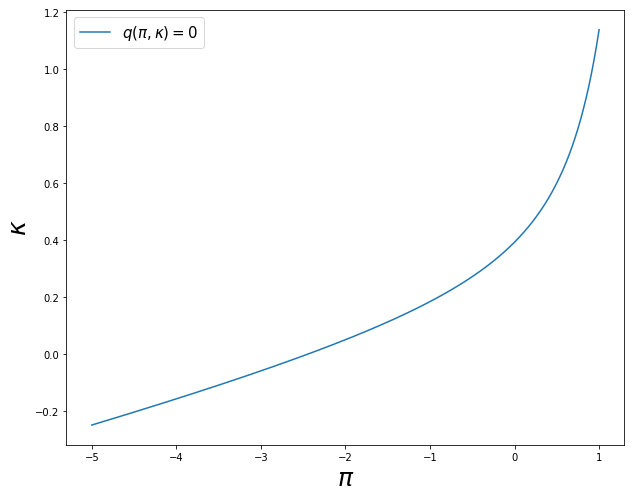

In [215]:
plt.figure(figsize=(10, 8))
#plt.plot(p_lvl2[800:1000], k_lvl2[800:1000], label=r"$q(\pi, \kappa)=0$")
plt.plot(p_lvl2, k_lvl2, label=r"$q(\pi, \kappa)=0$")

plt.xlabel(r"$\pi$", fontsize=25)
plt.ylabel(r"$\kappa$", fontsize=25)
plt.legend(loc="best", fontsize=15)
#plt.savefig("q0.pdf", bbox_inches="tight")
plt.show()

In [34]:
k_lvl2[1997:2000]

array([1.12754916, 1.13330324, 1.13911128])

## Caso 3
---
Integramos en el intervalo $(-\infty, +\infty)$ para valores de $\pi$:
$$\pi \in [0, 1]$$  $$z \in (-\infty, +\infty)$$

In [216]:
def kappa_level3(a, b, N, param_dict):
    # Definimos los pi que vamos a iterar
    pi_it = np.linspace(a, b, N)
    
    coef = 1./(param_dict["eta"]*param_dict["beta"]*param_dict["rho"]*param_dict["sig"])
    kapp = []
    
    for i in range(N):
        RKint  = RK4(kappa_int, lim_inf, lim_sup, 1000, 1e129, pi_it[i])
        RKint += RK4(kappa_int, Lim_inf, Lim_sup, 1000, 1e129, pi_it[i])
        corch  = param_dict["eta"]*pi_it[i]*param_dict["sig"]*param_dict["sig"] - param_dict["mu"] - RKint
        kapp.append(coef*corch)
    
    kapp = np.array(kapp)
    return pi_it, kapp

In [218]:
# Limites de la integral para x<0
lim_inf = -0.5
lim_sup = -0.0001#-2.401
# Limites de la integral para x>0
Lim_inf = 0.0001
Lim_sup = 0.5

p_lvl3, k_lvl3 = kappa_level3(0.0, 1.0, 2000, all_params)

Diferencia f(x+dx) - f(x):  -53.60856658359913
Diferencia f(x+dx) - f(x):  -0.002063936176667558
Diferencia f(x+dx) - f(x):  -53.60841705347309
Diferencia f(x+dx) - f(x):  -0.002061437707324254
Diferencia f(x+dx) - f(x):  -53.60826752183527
Diferencia f(x+dx) - f(x):  -0.002058940076369753
Diferencia f(x+dx) - f(x):  -53.60811798868542
Diferencia f(x+dx) - f(x):  -0.0020564432977218106
Diferencia f(x+dx) - f(x):  -53.60796845402359
Diferencia f(x+dx) - f(x):  -0.0020539473852076995
Diferencia f(x+dx) - f(x):  -53.60781891784998
Diferencia f(x+dx) - f(x):  -0.00205145235255233
Diferencia f(x+dx) - f(x):  -53.60766938016411
Diferencia f(x+dx) - f(x):  -0.0020489582133893514
Diferencia f(x+dx) - f(x):  -53.607519840966575
Diferencia f(x+dx) - f(x):  -0.002046464981247831
Diferencia f(x+dx) - f(x):  -53.607370300256974
Diferencia f(x+dx) - f(x):  -0.0020439726695694604
Diferencia f(x+dx) - f(x):  -53.60722075803531
Diferencia f(x+dx) - f(x):  -0.0020414812916960123
Diferencia f(x+dx) - f(x

Diferencia f(x+dx) - f(x):  -53.59540214382886
Diferencia f(x+dx) - f(x):  -0.0018485993441506032
Diferencia f(x+dx) - f(x):  -53.595252480617006
Diferencia f(x+dx) - f(x):  -0.0018462183553202838
Diferencia f(x+dx) - f(x):  -53.59510281589229
Diferencia f(x+dx) - f(x):  -0.0018438391082183925
Diferencia f(x+dx) - f(x):  -53.594953149654856
Diferencia f(x+dx) - f(x):  -0.00184146160992682
Diferencia f(x+dx) - f(x):  -53.59480348190439
Diferencia f(x+dx) - f(x):  -0.001839085867473167
Diferencia f(x+dx) - f(x):  -53.5946538126413
Diferencia f(x+dx) - f(x):  -0.0018367118878220845
Diferencia f(x+dx) - f(x):  -53.59450414186546
Diferencia f(x+dx) - f(x):  -0.001834339677880048
Diferencia f(x+dx) - f(x):  -53.5943544695767
Diferencia f(x+dx) - f(x):  -0.0018319692444932478
Diferencia f(x+dx) - f(x):  -53.594204795775084
Diferencia f(x+dx) - f(x):  -0.0018296005944531402
Diferencia f(x+dx) - f(x):  -53.59405512046075
Diferencia f(x+dx) - f(x):  -0.0018272337344863443
Diferencia f(x+dx) - f(

Diferencia f(x+dx) - f(x):  -53.58267536923722
Diferencia f(x+dx) - f(x):  -0.0016530219276308378
Diferencia f(x+dx) - f(x):  -53.58252557740431
Diferencia f(x+dx) - f(x):  -0.0016508089833303652
Diferencia f(x+dx) - f(x):  -53.58237578405783
Diferencia f(x+dx) - f(x):  -0.0016485981988649812
Diferencia f(x+dx) - f(x):  -53.58222598919781
Diferencia f(x+dx) - f(x):  -0.001646389577267371
Diferencia f(x+dx) - f(x):  -53.58207619282413
Diferencia f(x+dx) - f(x):  -0.001644183121536802
Diferencia f(x+dx) - f(x):  -53.58192639493669
Diferencia f(x+dx) - f(x):  -0.0016419788346306863
Diferencia f(x+dx) - f(x):  -53.58177659553567
Diferencia f(x+dx) - f(x):  -0.0016397767194743507
Diferencia f(x+dx) - f(x):  -53.58162679462097
Diferencia f(x+dx) - f(x):  -0.0016375767789574835
Diferencia f(x+dx) - f(x):  -53.581476992192734
Diferencia f(x+dx) - f(x):  -0.0016353790159288062
Diferencia f(x+dx) - f(x):  -53.5813271882507
Diferencia f(x+dx) - f(x):  -0.0016331834332068418
Diferencia f(x+dx) - f

Diferencia f(x+dx) - f(x):  -0.0014708423163951045
Diferencia f(x+dx) - f(x):  -53.56963781633047
Diferencia f(x+dx) - f(x):  -0.0014688228648130908
Diferencia f(x+dx) - f(x):  -53.569487892776976
Diferencia f(x+dx) - f(x):  -0.0014668057194666684
Diferencia f(x+dx) - f(x):  -53.569337967709004
Diferencia f(x+dx) - f(x):  -0.0014647908809101162
Diferencia f(x+dx) - f(x):  -53.56918804112672
Diferencia f(x+dx) - f(x):  -0.0014627783496804492
Diferencia f(x+dx) - f(x):  -53.56903811302965
Diferencia f(x+dx) - f(x):  -0.0014607681262898686
Diferencia f(x+dx) - f(x):  -53.56888818341835
Diferencia f(x+dx) - f(x):  -0.0014587602112318132
Diferencia f(x+dx) - f(x):  -53.56873825229246
Diferencia f(x+dx) - f(x):  -0.0014567546049761293
Diferencia f(x+dx) - f(x):  -53.56858831965204
Diferencia f(x+dx) - f(x):  -0.0014547513079714025
Diferencia f(x+dx) - f(x):  -53.568438385497274
Diferencia f(x+dx) - f(x):  -0.0014527503206479553
Diferencia f(x+dx) - f(x):  -53.568288449827804
Diferencia f(x+d

Diferencia f(x+dx) - f(x):  -53.556888906690546
Diferencia f(x+dx) - f(x):  -0.0013056139723507387
Diferencia f(x+dx) - f(x):  -53.55673885437278
Diferencia f(x+dx) - f(x):  -0.001303792931571679
Diferencia f(x+dx) - f(x):  -53.556588800539885
Diferencia f(x+dx) - f(x):  -0.0013019741779533023
Diferencia f(x+dx) - f(x):  -53.5564387451916
Diferencia f(x+dx) - f(x):  -0.0013001577106149798
Diferencia f(x+dx) - f(x):  -53.55628868832798
Diferencia f(x+dx) - f(x):  -0.0012983435286642586
Diferencia f(x+dx) - f(x):  -53.556138629948975
Diferencia f(x+dx) - f(x):  -0.0012965316311935315
Diferencia f(x+dx) - f(x):  -53.555988570054694
Diferencia f(x+dx) - f(x):  -0.0012947220172865315
Diferencia f(x+dx) - f(x):  -53.555838508645195
Diferencia f(x+dx) - f(x):  -0.0012929146860132246
Diferencia f(x+dx) - f(x):  -53.55568844572022
Diferencia f(x+dx) - f(x):  -0.0012911096364318642
Diferencia f(x+dx) - f(x):  -53.55553838127986
Diferencia f(x+dx) - f(x):  -0.0012893068675885466
Diferencia f(x+dx

Diferencia f(x+dx) - f(x):  -53.543828685293875
Diferencia f(x+dx) - f(x):  -0.0011556219490939657
Diferencia f(x+dx) - f(x):  -53.543678501108815
Diferencia f(x+dx) - f(x):  -0.0011539954704060107
Diferencia f(x+dx) - f(x):  -53.54352831540771
Diferencia f(x+dx) - f(x):  -0.0011523711645174406
Diferencia f(x+dx) - f(x):  -53.54337812819031
Diferencia f(x+dx) - f(x):  -0.001150749029759257
Diferencia f(x+dx) - f(x):  -53.54322793945673
Diferencia f(x+dx) - f(x):  -0.0011491290644552454
Diferencia f(x+dx) - f(x):  -53.543077749207015
Diferencia f(x+dx) - f(x):  -0.0011475112669230292
Diferencia f(x+dx) - f(x):  -53.54292755744112
Diferencia f(x+dx) - f(x):  -0.0011458956354740701
Diferencia f(x+dx) - f(x):  -53.54277736415909
Diferencia f(x+dx) - f(x):  -0.0011442821684151117
Diferencia f(x+dx) - f(x):  -53.5426271693608
Diferencia f(x+dx) - f(x):  -0.0011426708640440153
Diferencia f(x+dx) - f(x):  -53.542476973046234
Diferencia f(x+dx) - f(x):  -0.001141061720655534
Diferencia f(x+dx) 

Diferencia f(x+dx) - f(x):  -0.001022057682850075
Diferencia f(x+dx) - f(x):  -53.53060667211611
Diferencia f(x+dx) - f(x):  -0.0010206134375005393
Diferencia f(x+dx) - f(x):  -53.530456354472506
Diferencia f(x+dx) - f(x):  -0.0010191712013639664
Diferencia f(x+dx) - f(x):  -53.53030603531161
Diferencia f(x+dx) - f(x):  -0.0010177309723998773
Diferencia f(x+dx) - f(x):  -53.53015571463396
Diferencia f(x+dx) - f(x):  -0.0010162927485636297
Diferencia f(x+dx) - f(x):  -53.530005392439165
Diferencia f(x+dx) - f(x):  -0.0010148565278091937
Diferencia f(x+dx) - f(x):  -53.5298550687273
Diferencia f(x+dx) - f(x):  -0.0010134223080874305
Diferencia f(x+dx) - f(x):  -53.52970474349854
Diferencia f(x+dx) - f(x):  -0.001011990087346204
Diferencia f(x+dx) - f(x):  -53.52955441675263
Diferencia f(x+dx) - f(x):  -0.0010105598635328783
Diferencia f(x+dx) - f(x):  -53.5294040884896
Diferencia f(x+dx) - f(x):  -0.0010091316345896273
Diferencia f(x+dx) - f(x):  -53.52925375870964
Diferencia f(x+dx) - f

Diferencia f(x+dx) - f(x):  -53.51797470080433
Diferencia f(x+dx) - f(x):  -0.0009062639101851955
Diferencia f(x+dx) - f(x):  -53.517824255697434
Diferencia f(x+dx) - f(x):  -0.0009049829682117316
Diferencia f(x+dx) - f(x):  -53.51767380907259
Diferencia f(x+dx) - f(x):  -0.0009037038556899413
Diferencia f(x+dx) - f(x):  -53.517523360929914
Diferencia f(x+dx) - f(x):  -0.0009024265704606349
Diferencia f(x+dx) - f(x):  -53.51737291126929
Diferencia f(x+dx) - f(x):  -0.0009011511103656222
Diferencia f(x+dx) - f(x):  -53.517222460090835
Diferencia f(x+dx) - f(x):  -0.0008998774732443815
Diferencia f(x+dx) - f(x):  -53.51707200739469
Diferencia f(x+dx) - f(x):  -0.0008986056569380285
Diferencia f(x+dx) - f(x):  -53.51692155318054
Diferencia f(x+dx) - f(x):  -0.0008973356592864301
Diferencia f(x+dx) - f(x):  -53.51677109744844
Diferencia f(x+dx) - f(x):  -0.000896067478129231
Diferencia f(x+dx) - f(x):  -53.51662064019854
Diferencia f(x+dx) - f(x):  -0.0008948011113055765
Diferencia f(x+dx)

Diferencia f(x+dx) - f(x):  -0.0008037016230325045
Diferencia f(x+dx) - f(x):  -53.505030872901756
Diferencia f(x+dx) - f(x):  -0.0008025684776783726
Diferencia f(x+dx) - f(x):  -53.504880297224815
Diferencia f(x+dx) - f(x):  -0.0008014369786837894
Diferencia f(x+dx) - f(x):  -53.504729720029275
Diferencia f(x+dx) - f(x):  -0.0008003071239173487
Diferencia f(x+dx) - f(x):  -53.504579141314935
Diferencia f(x+dx) - f(x):  -0.0007991789112487546
Diferencia f(x+dx) - f(x):  -53.50442856108182
Diferencia f(x+dx) - f(x):  -0.000798052338549432
Diferencia f(x+dx) - f(x):  -53.50427797933011
Diferencia f(x+dx) - f(x):  -0.0007969274036908058
Diferencia f(x+dx) - f(x):  -53.50412739605963
Diferencia f(x+dx) - f(x):  -0.000795804104545661
Diferencia f(x+dx) - f(x):  -53.50397681127055
Diferencia f(x+dx) - f(x):  -0.000794682438987393
Diferencia f(x+dx) - f(x):  -53.50382622496258
Diferencia f(x+dx) - f(x):  -0.0007935624048913681
Diferencia f(x+dx) - f(x):  -53.50367563713593
Diferencia f(x+dx) 

Diferencia f(x+dx) - f(x):  -53.49207581289369
Diferencia f(x+dx) - f(x):  -0.0007110535334389767
Diferencia f(x+dx) - f(x):  -53.491925106574115
Diferencia f(x+dx) - f(x):  -0.0007100557678653974
Diferencia f(x+dx) - f(x):  -53.49177439873492
Diferencia f(x+dx) - f(x):  -0.000709059467677936
Diferencia f(x+dx) - f(x):  -53.491623689376354
Diferencia f(x+dx) - f(x):  -0.000708064630859484
Diferencia f(x+dx) - f(x):  -53.49147297849797
Diferencia f(x+dx) - f(x):  -0.0007070712553937097
Diferencia f(x+dx) - f(x):  -53.4913222661003
Diferencia f(x+dx) - f(x):  -0.0007060793392661413
Diferencia f(x+dx) - f(x):  -53.49117155218292
Diferencia f(x+dx) - f(x):  -0.0007050888804637778
Diferencia f(x+dx) - f(x):  -53.491020836746
Diferencia f(x+dx) - f(x):  -0.0007040998769757556
Diferencia f(x+dx) - f(x):  -53.490870119789605
Diferencia f(x+dx) - f(x):  -0.0007031123267922934
Diferencia f(x+dx) - f(x):  -53.49071940131347
Diferencia f(x+dx) - f(x):  -0.0007021262279052753
Diferencia f(x+dx) - f

Diferencia f(x+dx) - f(x):  -53.47895867749074
Diferencia f(x+dx) - f(x):  -0.0006295198620509257
Diferencia f(x+dx) - f(x):  -53.47880783893538
Diferencia f(x+dx) - f(x):  -0.0006286422193751418
Diferencia f(x+dx) - f(x):  -53.47865699885958
Diferencia f(x+dx) - f(x):  -0.0006277658731013436
Diferencia f(x+dx) - f(x):  -53.47850615726338
Diferencia f(x+dx) - f(x):  -0.0006268908213690472
Diferencia f(x+dx) - f(x):  -53.47835531414677
Diferencia f(x+dx) - f(x):  -0.0006260170623197114
Diferencia f(x+dx) - f(x):  -53.478204469509905
Diferencia f(x+dx) - f(x):  -0.0006251445940968214
Diferencia f(x+dx) - f(x):  -53.47805362335251
Diferencia f(x+dx) - f(x):  -0.0006242734148458051
Diferencia f(x+dx) - f(x):  -53.477902775674636
Diferencia f(x+dx) - f(x):  -0.0006234035227143941
Diferencia f(x+dx) - f(x):  -53.477751926476486
Diferencia f(x+dx) - f(x):  -0.0006225349158517912
Diferencia f(x+dx) - f(x):  -53.47760107575769
Diferencia f(x+dx) - f(x):  -0.000621667592409253
Diferencia f(x+dx)

Diferencia f(x+dx) - f(x):  -0.0005593686482083249
Diferencia f(x+dx) - f(x):  -53.46598100371696
Diferencia f(x+dx) - f(x):  -0.0005585947543338687
Diferencia f(x+dx) - f(x):  -53.46583003437266
Diferencia f(x+dx) - f(x):  -0.0005578220058557459
Diferencia f(x+dx) - f(x):  -53.465679063507
Diferencia f(x+dx) - f(x):  -0.0005570504010847382
Diferencia f(x+dx) - f(x):  -53.465528091120035
Diferencia f(x+dx) - f(x):  -0.0005562799383334038
Diferencia f(x+dx) - f(x):  -53.465377117211915
Diferencia f(x+dx) - f(x):  -0.0005555106159168405
Diferencia f(x+dx) - f(x):  -53.465226141782466
Diferencia f(x+dx) - f(x):  -0.0005547424321517835
Diferencia f(x+dx) - f(x):  -53.465075164831944
Diferencia f(x+dx) - f(x):  -0.0005539753853571472
Diferencia f(x+dx) - f(x):  -53.46492418635998
Diferencia f(x+dx) - f(x):  -0.000553209473853733
Diferencia f(x+dx) - f(x):  -53.46477320636674
Diferencia f(x+dx) - f(x):  -0.0005524446959649792
Diferencia f(x+dx) - f(x):  -53.46462222485229
Diferencia f(x+dx) 

Diferencia f(x+dx) - f(x):  -53.45329427483807
Diferencia f(x+dx) - f(x):  -0.0004975140306373305
Diferencia f(x+dx) - f(x):  -53.453143177676054
Diferencia f(x+dx) - f(x):  -0.0004968316669307915
Diferencia f(x+dx) - f(x):  -53.45299207899183
Diferencia f(x+dx) - f(x):  -0.0004961503123328409
Diferencia f(x+dx) - f(x):  -53.45284097878553
Diferencia f(x+dx) - f(x):  -0.000495469965328274
Diferencia f(x+dx) - f(x):  -53.45268987705734
Diferencia f(x+dx) - f(x):  -0.0004947906244025385
Diferencia f(x+dx) - f(x):  -53.45253877380671
Diferencia f(x+dx) - f(x):  -0.0004941122880440935
Diferencia f(x+dx) - f(x):  -53.452387669034295
Diferencia f(x+dx) - f(x):  -0.0004934349547429245
Diferencia f(x+dx) - f(x):  -53.452236562739614
Diferencia f(x+dx) - f(x):  -0.0004927586229910852
Diferencia f(x+dx) - f(x):  -53.45208545492284
Diferencia f(x+dx) - f(x):  -0.0004920832912828216
Diferencia f(x+dx) - f(x):  -53.45193434558408
Diferencia f(x+dx) - f(x):  -0.0004914089581142117
Diferencia f(x+dx)

Diferencia f(x+dx) - f(x):  -53.44029435476398
Diferencia f(x+dx) - f(x):  -0.0004423681427537657
Diferencia f(x+dx) - f(x):  -53.4401431266688
Diferencia f(x+dx) - f(x):  -0.00044176722541033886
Diferencia f(x+dx) - f(x):  -53.439991897050845
Diferencia f(x+dx) - f(x):  -0.0004411671940489914
Diferencia f(x+dx) - f(x):  -53.43984066590983
Diferencia f(x+dx) - f(x):  -0.00044056804732291177
Diferencia f(x+dx) - f(x):  -53.43968943324592
Diferencia f(x+dx) - f(x):  -0.0004399697838864264
Diferencia f(x+dx) - f(x):  -53.43953819905903
Diferencia f(x+dx) - f(x):  -0.0004393724023965817
Diferencia f(x+dx) - f(x):  -53.43938696334922
Diferencia f(x+dx) - f(x):  -0.0004387759015118259
Diferencia f(x+dx) - f(x):  -53.43923572611655
Diferencia f(x+dx) - f(x):  -0.00043818027989254993
Diferencia f(x+dx) - f(x):  -53.439084487360816
Diferencia f(x+dx) - f(x):  -0.0004375855362013792
Diferencia f(x+dx) - f(x):  -53.43893324708216
Diferencia f(x+dx) - f(x):  -0.00043699166910228515
Diferencia f(x+

Diferencia f(x+dx) - f(x):  -0.000393793633795686
Diferencia f(x+dx) - f(x):  -53.427131812250934
Diferencia f(x+dx) - f(x):  -0.0003932641783370161
Diferencia f(x+dx) - f(x):  -53.42698045162609
Diferencia f(x+dx) - f(x):  -0.0003927354997888821
Diferencia f(x+dx) - f(x):  -53.42682908947759
Diferencia f(x+dx) - f(x):  -0.00039220759696148577
Diferencia f(x+dx) - f(x):  -53.42667772580518
Diferencia f(x+dx) - f(x):  -0.00039168046866669415
Diferencia f(x+dx) - f(x):  -53.42652636060896
Diferencia f(x+dx) - f(x):  -0.0003911541137185254
Diferencia f(x+dx) - f(x):  -53.426374993889
Diferencia f(x+dx) - f(x):  -0.00039062853093208005
Diferencia f(x+dx) - f(x):  -53.426223625645235
Diferencia f(x+dx) - f(x):  -0.0003901037191248319
Diferencia f(x+dx) - f(x):  -53.426072255877756
Diferencia f(x+dx) - f(x):  -0.0003895796771157256
Diferencia f(x+dx) - f(x):  -53.42592088458639
Diferencia f(x+dx) - f(x):  -0.00038905640372539907
Diferencia f(x+dx) - f(x):  -53.425769511771136
Diferencia f(x+

Diferencia f(x+dx) - f(x):  -0.0003523865028305373
Diferencia f(x+dx) - f(x):  -53.41456369411725
Diferencia f(x+dx) - f(x):  -0.00035191763956035627
Diferencia f(x+dx) - f(x):  -53.41441220698644
Diferencia f(x+dx) - f(x):  -0.0003514494602335494
Diferencia f(x+dx) - f(x):  -53.41426071833109
Diferencia f(x+dx) - f(x):  -0.0003509819637992073
Diferencia f(x+dx) - f(x):  -53.414109228151204
Diferencia f(x+dx) - f(x):  -0.00035051514920787785
Diferencia f(x+dx) - f(x):  -53.41395773644666
Diferencia f(x+dx) - f(x):  -0.0003500490154119268
Diferencia f(x+dx) - f(x):  -53.413806243217465
Diferencia f(x+dx) - f(x):  -0.00034958356136507995
Diferencia f(x+dx) - f(x):  -53.41365474846381
Diferencia f(x+dx) - f(x):  -0.000349118786022784
Diferencia f(x+dx) - f(x):  -53.41350325218522
Diferencia f(x+dx) - f(x):  -0.00034865468834190116
Diferencia f(x+dx) - f(x):  -53.41335175438229
Diferencia f(x+dx) - f(x):  -0.00034819126728109773
Diferencia f(x+dx) - f(x):  -53.41320025505456
Diferencia f(x

Diferencia f(x+dx) - f(x):  -53.4016818442696
Diferencia f(x+dx) - f(x):  -0.00031445982938942824
Diferencia f(x+dx) - f(x):  -53.40153022751409
Diferencia f(x+dx) - f(x):  -0.00031404610262512206
Diferencia f(x+dx) - f(x):  -53.40137860923335
Diferencia f(x+dx) - f(x):  -0.00031363297503479715
Diferencia f(x+dx) - f(x):  -53.40122698942693
Diferencia f(x+dx) - f(x):  -0.0003132204456972598
Diferencia f(x+dx) - f(x):  -53.40107536809515
Diferencia f(x+dx) - f(x):  -0.00031280851369252377
Diferencia f(x+dx) - f(x):  -53.400923745237975
Diferencia f(x+dx) - f(x):  -0.00031239717810212925
Diferencia f(x+dx) - f(x):  -53.400772120855294
Diferencia f(x+dx) - f(x):  -0.00031198643800890713
Diferencia f(x+dx) - f(x):  -53.400620494947105
Diferencia f(x+dx) - f(x):  -0.0003115762924974022
Diferencia f(x+dx) - f(x):  -53.40046886751344
Diferencia f(x+dx) - f(x):  -0.0003111667406531654
Diferencia f(x+dx) - f(x):  -53.400317238554265
Diferencia f(x+dx) - f(x):  -0.0003107577815635171
Diferencia 

Diferencia f(x+dx) - f(x):  -53.389092461649625
Diferencia f(x+dx) - f(x):  -0.0002820774028691603
Diferencia f(x+dx) - f(x):  -53.38894071825064
Diferencia f(x+dx) - f(x):  -0.00028171039945062287
Diferencia f(x+dx) - f(x):  -53.38878897332535
Diferencia f(x+dx) - f(x):  -0.00028134392340129627
Diferencia f(x+dx) - f(x):  -53.38863722687395
Diferencia f(x+dx) - f(x):  -0.0002809779739114601
Diferencia f(x+dx) - f(x):  -53.38848547889614
Diferencia f(x+dx) - f(x):  -0.0002806125501726084
Diferencia f(x+dx) - f(x):  -53.38833372939203
Diferencia f(x+dx) - f(x):  -0.0002802476513775812
Diferencia f(x+dx) - f(x):  -53.388181978361786
Diferencia f(x+dx) - f(x):  -0.00027988327672058555
Diferencia f(x+dx) - f(x):  -53.38803022580515
Diferencia f(x+dx) - f(x):  -0.0002795194253967792
Diferencia f(x+dx) - f(x):  -53.38787847172219
Diferencia f(x+dx) - f(x):  -0.00027915609660276314
Diferencia f(x+dx) - f(x):  -53.38772671611309
Diferencia f(x+dx) - f(x):  -0.0002787932895365122
Diferencia f(x

Diferencia f(x+dx) - f(x):  -0.00025268734951901933
Diferencia f(x+dx) - f(x):  -53.37603694991196
Diferencia f(x+dx) - f(x):  -0.0002523624032336469
Diferencia f(x+dx) - f(x):  -53.37588507522008
Diferencia f(x+dx) - f(x):  -0.0002520379198357736
Diferencia f(x+dx) - f(x):  -53.375733199001246
Diferencia f(x+dx) - f(x):  -0.00025171389861708415
Diferencia f(x+dx) - f(x):  -53.3755813212552
Diferencia f(x+dx) - f(x):  -0.0002513903388703595
Diferencia f(x+dx) - f(x):  -53.375429441982135
Diferencia f(x+dx) - f(x):  -0.00025106723988931046
Diferencia f(x+dx) - f(x):  -53.37527756118183
Diferencia f(x+dx) - f(x):  -0.00025074460096881357
Diferencia f(x+dx) - f(x):  -53.3751256788544
Diferencia f(x+dx) - f(x):  -0.0002504224214051401
Diferencia f(x+dx) - f(x):  -53.37497379499999
Diferencia f(x+dx) - f(x):  -0.00025010070049519967
Diferencia f(x+dx) - f(x):  -53.37482190961828
Diferencia f(x+dx) - f(x):  -0.00024977943753742154
Diferencia f(x+dx) - f(x):  -53.37467002270938
Diferencia f(x

Diferencia f(x+dx) - f(x):  -0.00022722893017776413
Diferencia f(x+dx) - f(x):  -53.363426152892146
Diferencia f(x+dx) - f(x):  -0.00022694009248291902
Diferencia f(x+dx) - f(x):  -53.363274151418125
Diferencia f(x+dx) - f(x):  -0.00022665166252954644
Diferencia f(x+dx) - f(x):  -53.36312214841621
Diferencia f(x+dx) - f(x):  -0.00022636363969650436
Diferencia f(x+dx) - f(x):  -53.362970143886315
Diferencia f(x+dx) - f(x):  -0.00022607602336361526
Diferencia f(x+dx) - f(x):  -53.362818137828526
Diferencia f(x+dx) - f(x):  -0.00022578881291149266
Diferencia f(x+dx) - f(x):  -53.36266613024296
Diferencia f(x+dx) - f(x):  -0.00022550200772200601
Diferencia f(x+dx) - f(x):  -53.362514121129294
Diferencia f(x+dx) - f(x):  -0.00022521560717791295
Diferencia f(x+dx) - f(x):  -53.362362110487624
Diferencia f(x+dx) - f(x):  -0.0002249296106628662
Diferencia f(x+dx) - f(x):  -53.362210098318116
Diferencia f(x+dx) - f(x):  -0.00022464401756157326
Diferencia f(x+dx) - f(x):  -53.3620580846206
Difer

Diferencia f(x+dx) - f(x):  -0.00020381764914363665
Diferencia f(x+dx) - f(x):  -53.3503484406028
Diferencia f(x+dx) - f(x):  -0.00020356170434525367
Diferencia f(x+dx) - f(x):  -53.350196307692414
Diferencia f(x+dx) - f(x):  -0.00020330611731254195
Diferencia f(x+dx) - f(x):  -53.35004417325314
Diferencia f(x+dx) - f(x):  -0.00020305088750365713
Diferencia f(x+dx) - f(x):  -53.349892037284945
Diferencia f(x+dx) - f(x):  -0.00020279601437753203
Diferencia f(x+dx) - f(x):  -53.34973989978826
Diferencia f(x+dx) - f(x):  -0.0002025414973940709
Diferencia f(x+dx) - f(x):  -53.34958776076266
Diferencia f(x+dx) - f(x):  -0.00020228733601386495
Diferencia f(x+dx) - f(x):  -53.34943562020837
Diferencia f(x+dx) - f(x):  -0.00020203352969849764
Diferencia f(x+dx) - f(x):  -53.34928347812513
Diferencia f(x+dx) - f(x):  -0.00020178007791046837
Diferencia f(x+dx) - f(x):  -53.34913133451312
Diferencia f(x+dx) - f(x):  -0.00020152698011290798
Diferencia f(x+dx) - f(x):  -53.348979189372386
Diferenci

Diferencia f(x+dx) - f(x):  -0.0001832877416518726
Diferencia f(x+dx) - f(x):  -53.33741168455708
Diferencia f(x+dx) - f(x):  -0.00018306035472338486
Diferencia f(x+dx) - f(x):  -53.337259421666545
Diferencia f(x+dx) - f(x):  -0.00018283328244249678
Diferencia f(x+dx) - f(x):  -53.33710715724638
Diferencia f(x+dx) - f(x):  -0.00018260652433577107
Diferencia f(x+dx) - f(x):  -53.336954891296756
Diferencia f(x+dx) - f(x):  -0.00018238007993054764
Diferencia f(x+dx) - f(x):  -53.33680262381719
Diferencia f(x+dx) - f(x):  -0.00018215394875498864
Diferencia f(x+dx) - f(x):  -53.33665035480817
Diferencia f(x+dx) - f(x):  -0.00018192813033794317
Diferencia f(x+dx) - f(x):  -53.336498084269635
Diferencia f(x+dx) - f(x):  -0.0001817026242089334
Diferencia f(x+dx) - f(x):  -53.33634581220133
Diferencia f(x+dx) - f(x):  -0.00018147742989836624
Diferencia f(x+dx) - f(x):  -53.33619353860345
Diferencia f(x+dx) - f(x):  -0.000181252546937391
Diferencia f(x+dx) - f(x):  -53.336041263475806
Diferencia

Diferencia f(x+dx) - f(x):  -53.32446387720367
Diferencia f(x+dx) - f(x):  -0.00016483561054823556
Diferencia f(x+dx) - f(x):  -53.32431148426156
Diferencia f(x+dx) - f(x):  -0.00016463362748436738
Diferencia f(x+dx) - f(x):  -53.32415908978916
Diferencia f(x+dx) - f(x):  -0.00016443192098409068
Diferencia f(x+dx) - f(x):  -53.32400669378612
Diferencia f(x+dx) - f(x):  -0.00016423049063440942
Diferencia f(x+dx) - f(x):  -53.32385429625265
Diferencia f(x+dx) - f(x):  -0.00016402933602295555
Diferencia f(x+dx) - f(x):  -53.32370189718864
Diferencia f(x+dx) - f(x):  -0.00016382845673820062
Diferencia f(x+dx) - f(x):  -53.32354949659424
Diferencia f(x+dx) - f(x):  -0.00016362785236901517
Diferencia f(x+dx) - f(x):  -53.323397094469414
Diferencia f(x+dx) - f(x):  -0.00016342752250505035
Diferencia f(x+dx) - f(x):  -53.323244690813965
Diferencia f(x+dx) - f(x):  -0.00016322746673664776
Diferencia f(x+dx) - f(x):  -53.32309228562801
Diferencia f(x+dx) - f(x):  -0.00016302768465472142
Diferenc

Diferencia f(x+dx) - f(x):  -53.3118100539989
Diferencia f(x+dx) - f(x):  -0.00014897539038507754
Diferencia f(x+dx) - f(x):  -53.31165753399631
Diferencia f(x+dx) - f(x):  -0.00014879501498976655
Diferencia f(x+dx) - f(x):  -53.31150501246236
Diferencia f(x+dx) - f(x):  -0.00014861488401423165
Diferencia f(x+dx) - f(x):  -53.31135248939722
Diferencia f(x+dx) - f(x):  -0.00014843499709626604
Diferencia f(x+dx) - f(x):  -53.31119996480072
Diferencia f(x+dx) - f(x):  -0.00014825535387437763
Diferencia f(x+dx) - f(x):  -53.31104743867289
Diferencia f(x+dx) - f(x):  -0.00014807595398765375
Diferencia f(x+dx) - f(x):  -53.31089491101389
Diferencia f(x+dx) - f(x):  -0.00014789679707559802
Diferencia f(x+dx) - f(x):  -53.310742381823474
Diferencia f(x+dx) - f(x):  -0.00014771788277845657
Diferencia f(x+dx) - f(x):  -53.31058985110158
Diferencia f(x+dx) - f(x):  -0.0001475392107369508
Diferencia f(x+dx) - f(x):  -53.31043731884856
Diferencia f(x+dx) - f(x):  -0.0001473607805923781
Diferencia f

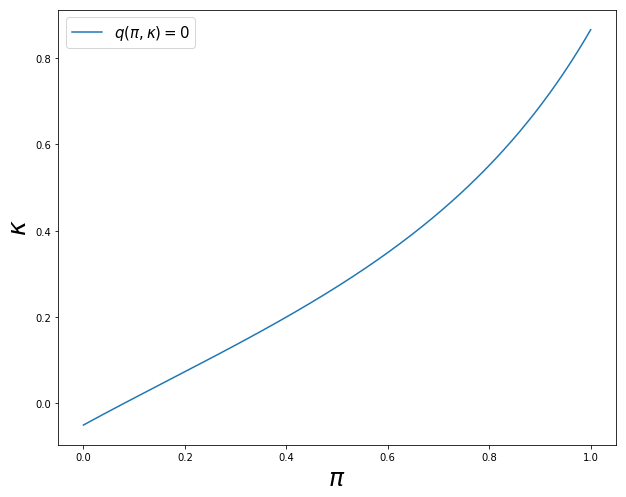

In [219]:
plt.figure(figsize=(10, 8))
plt.plot(p_lvl3, k_lvl3, label=r"$q(\pi, \kappa)=0$")
plt.xlabel(r"$\pi$", fontsize=25)
plt.ylabel(r"$\kappa$", fontsize=25)
plt.legend(loc="best", fontsize=15)
#plt.savefig("q0.pdf", bbox_inches="tight")
plt.show()

## Segunda curva de nivel:
---
Repetimos el procedimiento, ahora para la función:

$$\pi = \frac{\lambda}{\eta\beta\rho\sigma}\left\{ \int_0^c\frac{y\ f(y)}{\left[ 1-\kappa y \right]^{\eta}}dy +\frac{c[1-F(y)]}{\left[ 1-\kappa c \right]^{\eta}}\right\} + \frac{\beta\kappa}{\rho\sigma}-\frac{p}{\eta\beta\rho\sigma} \ \in (-\infty, +\infty)$$

Nuevamente, primero definimos la función dentro del término integral `pi_level_integ()`

In [38]:
def pi_level_integ(xx, y, kapp_par):#, param_dict):
    num = xx*dens_func(xx, y, all_params)#, param_dict)
    den = np.float_power(1-(kapp_par*xx), all_params["eta"])
    return num/den

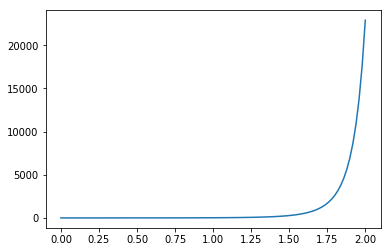

In [39]:
# Visualizacion funcion

x = np.linspace(0, 2, 100)
y = pi_level_integ(x, 0, 0.4)
plt.plot(x, y)
plt.show()

Ahora, calculamos la curva de nivel definiendo `pi_level()` como 

$$\pi = \frac{\lambda}{\eta\beta\rho\sigma}\left\{ \int_0^c\frac{y\ f(y)}{\left[ 1-\kappa y \right]^{\eta}}dy +\frac{c[1-F(y)]}{\left[ 1-\kappa c \right]^{\eta}}\right\} + \frac{\beta\kappa}{\rho\sigma}-\frac{p}{\eta\beta\rho\sigma} \ \in (-\infty, +\infty)$$

iterando valores de kappa según la restricción $\kappa \in [0, 1/c)$

In [220]:
def pi_level(param_dict):
    
    #k_it  = np.linspace(0.0, 1./param_dict["c"], 2000)
    k_it  = np.linspace(-1./param_dict["c"], 1./param_dict["c"], 2000)
    pi_it = []
    
    coef = param_dict["lamb"]/(param_dict["eta"]*param_dict["beta"]*param_dict["rho"]*param_dict["sig"])
    num2 = param_dict["c"]*(1.-dist_func(param_dict["c"], y, param_dict))
    ter4 = param_dict["p"]/(param_dict["eta"]*param_dict["beta"]*param_dict["rho"]*param_dict["sig"])
    for i in range(2000):
        #cor1 = NEW_RK4(pi_level_integ, 0, 1./param_dict["c"], 1000, k_it[i], 1.0, param_dict)
        cor1 = RK4(pi_level_integ, 0, 1./param_dict["c"], 1000, 5.0, k_it[i])
        cor2 = num2/(np.float_power(1-(k_it[i]*param_dict["c"]), param_dict["eta"]))
        ter3 = (param_dict["beta"]*k_it[i])/(param_dict["rho"]*param_dict["sig"])
        
        sol = coef*(cor1+cor2)+ter3-ter4
        pi_it.append(sol)
    
    pi_it = np.array(pi_it)
        
    return k_it, pi_it

In [221]:
all_params

{'C': 5.0,
 'M': 5.0,
 'alph': 0.5,
 'beta': 10,
 'c': 2,
 'eta': 7.0,
 'exp_lam': 2,
 'ff': 'Gamma',
 'gam_al': 2,
 'gam_bet': 2,
 'lamb': 8.0,
 'mu': 0.09,
 'p': 5,
 'par_al': 2,
 'par_xm': 2,
 'rho': 0.4,
 'sig': 0.3,
 'wei_k': 5,
 'wei_lam': 1}

In [222]:
kl, pil = pi_level(all_params)

Diferencia f(x+dx) - f(x):  -3.067890294752851e-05
Diferencia f(x+dx) - f(x):  -3.063516437881719e-05
Diferencia f(x+dx) - f(x):  -3.059121702905787e-05
Diferencia f(x+dx) - f(x):  -3.054706027225129e-05
Diferencia f(x+dx) - f(x):  -3.0502693480830012e-05
Diferencia f(x+dx) - f(x):  -3.0458116025103288e-05
Diferencia f(x+dx) - f(x):  -3.041332727408974e-05
Diferencia f(x+dx) - f(x):  -3.0368326594615302e-05
Diferencia f(x+dx) - f(x):  -3.032311335182669e-05
Diferencia f(x+dx) - f(x):  -3.0277686909357948e-05
Diferencia f(x+dx) - f(x):  -3.0232046628636544e-05
Diferencia f(x+dx) - f(x):  -3.018619186977156e-05
Diferencia f(x+dx) - f(x):  -3.0140121990610003e-05
Diferencia f(x+dx) - f(x):  -3.009383634762497e-05
Diferencia f(x+dx) - f(x):  -3.0047334295194017e-05
Diferencia f(x+dx) - f(x):  -3.0000615185862833e-05
Diferencia f(x+dx) - f(x):  -2.995367837071994e-05
Diferencia f(x+dx) - f(x):  -2.990652319853626e-05
Diferencia f(x+dx) - f(x):  -2.9859149016750464e-05
Diferencia f(x+dx) - f

Diferencia f(x+dx) - f(x):  -2.0119707469637427e-05
Diferencia f(x+dx) - f(x):  -2.0031598875452916e-05
Diferencia f(x+dx) - f(x):  -1.9943150365228646e-05
Diferencia f(x+dx) - f(x):  -1.9854360944648874e-05
Diferencia f(x+dx) - f(x):  -1.9765229616122704e-05
Diferencia f(x+dx) - f(x):  -1.967575537938082e-05
Diferencia f(x+dx) - f(x):  -1.9585937231586525e-05
Diferencia f(x+dx) - f(x):  -1.949577416678061e-05
Diferencia f(x+dx) - f(x):  -1.9405265176103415e-05
Diferencia f(x+dx) - f(x):  -1.9314409248238906e-05
Diferencia f(x+dx) - f(x):  -1.9223205368554264e-05
Diferencia f(x+dx) - f(x):  -1.913165252000193e-05
Diferencia f(x+dx) - f(x):  -1.9039749682162044e-05
Diferencia f(x+dx) - f(x):  -1.894749583228328e-05
Diferencia f(x+dx) - f(x):  -1.885488994432527e-05
Diferencia f(x+dx) - f(x):  -1.8761930989361075e-05
Diferencia f(x+dx) - f(x):  -1.8668617935854726e-05
Diferencia f(x+dx) - f(x):  -1.8574949748953462e-05
Diferencia f(x+dx) - f(x):  -1.8480925391362035e-05
Diferencia f(x+dx

Diferencia f(x+dx) - f(x):  -3.190008827785862e-07
Diferencia f(x+dx) - f(x):  -1.5956643310832686e-07
Diferencia f(x+dx) - f(x):  4.1519408744417063e-10
Diferencia f(x+dx) - f(x):  1.6094558218104904e-07
Diferencia f(x+dx) - f(x):  3.2202631913835766e-07
Diferencia f(x+dx) - f(x):  4.836589968526539e-07
Diferencia f(x+dx) - f(x):  6.458452125879255e-07
Diferencia f(x+dx) - f(x):  8.085865673967962e-07
Diferencia f(x+dx) - f(x):  9.718846674389159e-07
Diferencia f(x+dx) - f(x):  1.1357411234813597e-06
Diferencia f(x+dx) - f(x):  1.3001575503990281e-06
Diferencia f(x+dx) - f(x):  1.4651355683126255e-06
Diferencia f(x+dx) - f(x):  1.6306768013396589e-06
Diferencia f(x+dx) - f(x):  1.7967828788711948e-06
Diferencia f(x+dx) - f(x):  1.963455434406125e-06
Diferencia f(x+dx) - f(x):  2.1306961064671004e-06
Diferencia f(x+dx) - f(x):  2.298506538350731e-06
Diferencia f(x+dx) - f(x):  2.4668883775724737e-06
Diferencia f(x+dx) - f(x):  2.635843276921346e-06
Diferencia f(x+dx) - f(x):  2.8053728

Diferencia f(x+dx) - f(x):  3.497841361194132e-05
Diferencia f(x+dx) - f(x):  3.5254200600354224e-05
Diferencia f(x+dx) - f(x):  3.5530870930056135e-05
Diferencia f(x+dx) - f(x):  3.580842715317223e-05
Diferencia f(x+dx) - f(x):  3.608687182957149e-05
Diferencia f(x+dx) - f(x):  3.6366207526644656e-05
Diferencia f(x+dx) - f(x):  3.664643681861035e-05
Diferencia f(x+dx) - f(x):  3.692756228781957e-05
Diferencia f(x+dx) - f(x):  3.7209586524034055e-05
Diferencia f(x+dx) - f(x):  3.749251212406546e-05
Diferencia f(x+dx) - f(x):  3.7776341692996596e-05
Diferencia f(x+dx) - f(x):  3.806107784259938e-05
Diferencia f(x+dx) - f(x):  3.8346723193305454e-05
Diferencia f(x+dx) - f(x):  3.86332803721523e-05
Diferencia f(x+dx) - f(x):  3.892075201447631e-05
Diferencia f(x+dx) - f(x):  3.9209140763302175e-05
Diferencia f(x+dx) - f(x):  3.9498449268760005e-05
Diferencia f(x+dx) - f(x):  3.9788680189417613e-05
Diferencia f(x+dx) - f(x):  4.007983619080946e-05
Diferencia f(x+dx) - f(x):  4.037191994690

Diferencia f(x+dx) - f(x):  9.501770744119176e-05
Diferencia f(x+dx) - f(x):  9.548139692691637e-05
Diferencia f(x+dx) - f(x):  9.594651422556444e-05
Diferencia f(x+dx) - f(x):  9.641306348848189e-05
Diferencia f(x+dx) - f(x):  9.688104888055937e-05
Diferencia f(x+dx) - f(x):  9.735047457773427e-05
Diferencia f(x+dx) - f(x):  9.782134476932214e-05
Diferencia f(x+dx) - f(x):  9.829366365704528e-05
Diferencia f(x+dx) - f(x):  9.876743545417233e-05
Diferencia f(x+dx) - f(x):  9.924266438779417e-05
Diferencia f(x+dx) - f(x):  9.971935469624271e-05
Diferencia f(x+dx) - f(x):  0.00010019751063161664
Diferencia f(x+dx) - f(x):  0.00010067713645761645
Diferencia f(x+dx) - f(x):  0.00010115823645129307
Diferencia f(x+dx) - f(x):  0.00010164081490249277
Diferencia f(x+dx) - f(x):  0.0001021248761129967
Diferencia f(x+dx) - f(x):  0.00010261042439840828
Diferencia f(x+dx) - f(x):  0.00010309746408612708
Diferencia f(x+dx) - f(x):  0.00010358599951743042
Diferencia f(x+dx) - f(x):  0.0001040760350

Diferencia f(x+dx) - f(x):  0.00019583773375203561
Diferencia f(x+dx) - f(x):  0.00019660814433519747
Diferencia f(x+dx) - f(x):  0.00019738088039417123
Diferencia f(x+dx) - f(x):  0.00019815594877803377
Diferencia f(x+dx) - f(x):  0.00019893335635762233
Diferencia f(x+dx) - f(x):  0.00019971311002492387
Diferencia f(x+dx) - f(x):  0.00020049521669129877
Diferencia f(x+dx) - f(x):  0.00020127968329103352
Diferencia f(x+dx) - f(x):  0.00020206651677784349
Diferencia f(x+dx) - f(x):  0.00020285572412831465
Diferencia f(x+dx) - f(x):  0.00020364731233835087
Diferencia f(x+dx) - f(x):  0.00020444128842667109
Diferencia f(x+dx) - f(x):  0.00020523765943303296
Diferencia f(x+dx) - f(x):  0.00020603643241795533
Diferencia f(x+dx) - f(x):  0.00020683761446438353
Diferencia f(x+dx) - f(x):  0.0002076412126756355
Diferencia f(x+dx) - f(x):  0.0002084472341779553
Diferencia f(x+dx) - f(x):  0.00020925568611851464
Diferencia f(x+dx) - f(x):  0.00021006657566707831
Diferencia f(x+dx) - f(x):  0.000

Diferencia f(x+dx) - f(x):  0.00035762733611771624
Diferencia f(x+dx) - f(x):  0.00035888410090562095
Diferencia f(x+dx) - f(x):  0.0003601446369518868
Diferencia f(x+dx) - f(x):  0.0003614089555634692
Diferencia f(x+dx) - f(x):  0.0003626770680844049
Diferencia f(x+dx) - f(x):  0.00036394898589420244
Diferencia f(x+dx) - f(x):  0.00036522472040606546
Diferencia f(x+dx) - f(x):  0.00036650428307122285
Diferencia f(x+dx) - f(x):  0.0003677876853744877
Diferencia f(x+dx) - f(x):  0.00036907493883819864
Diferencia f(x+dx) - f(x):  0.000370366055020277
Diferencia f(x+dx) - f(x):  0.0003716610455145042
Diferencia f(x+dx) - f(x):  0.00037295992195102157
Diferencia f(x+dx) - f(x):  0.00037426269599649675
Diferencia f(x+dx) - f(x):  0.0003755693793535686
Diferencia f(x+dx) - f(x):  0.0003768799837625125
Diferencia f(x+dx) - f(x):  0.00037819452099951967
Diferencia f(x+dx) - f(x):  0.0003795130028778626
Diferencia f(x+dx) - f(x):  0.00038083544124778435
Diferencia f(x+dx) - f(x):  0.00038216184

Diferencia f(x+dx) - f(x):  0.000629636016091617
Diferencia f(x+dx) - f(x):  0.0006317103467183838
Diferencia f(x+dx) - f(x):  0.0006337909298093081
Diferencia f(x+dx) - f(x):  0.0006358777845491548
Diferencia f(x+dx) - f(x):  0.0006379709301847503
Diferencia f(x+dx) - f(x):  0.0006400703860241497
Diferencia f(x+dx) - f(x):  0.0006421761714389684
Diferencia f(x+dx) - f(x):  0.0006442883058621618
Diferencia f(x+dx) - f(x):  0.0006464068087893571
Diferencia f(x+dx) - f(x):  0.0006485316997795754
Diferencia f(x+dx) - f(x):  0.0006506629984542878
Diferencia f(x+dx) - f(x):  0.0006528007244983591
Diferencia f(x+dx) - f(x):  0.0006549448976613248
Diferencia f(x+dx) - f(x):  0.0006570955377540044
Diferencia f(x+dx) - f(x):  0.000659252664653609
Diferencia f(x+dx) - f(x):  0.0006614162983001881
Diferencia f(x+dx) - f(x):  0.0006635864586982398
Diferencia f(x+dx) - f(x):  0.0006657631659167107
Diferencia f(x+dx) - f(x):  0.0006679464400908275
Diferencia f(x+dx) - f(x):  0.0006701363014181005
Di

Diferencia f(x+dx) - f(x):  0.0010863978411782549
Diferencia f(x+dx) - f(x):  0.0010898578509928036
Diferencia f(x+dx) - f(x):  0.0010933284279442956
Diferencia f(x+dx) - f(x):  0.0010968096053691756
Diferencia f(x+dx) - f(x):  0.0011003014167153546
Diferencia f(x+dx) - f(x):  0.0011038038955425433
Diferencia f(x+dx) - f(x):  0.0011073170755219186
Diferencia f(x+dx) - f(x):  0.001110840990436679
Diferencia f(x+dx) - f(x):  0.0011143756741844868
Diferencia f(x+dx) - f(x):  0.001117921160773916
Diferencia f(x+dx) - f(x):  0.001121477484327893
Diferencia f(x+dx) - f(x):  0.0011250446790833646
Diferencia f(x+dx) - f(x):  0.0011286227793912973
Diferencia f(x+dx) - f(x):  0.0011322118197176767
Diferencia f(x+dx) - f(x):  0.0011358118346422863
Diferencia f(x+dx) - f(x):  0.0011394228588631483
Diferencia f(x+dx) - f(x):  0.0011430449271919718
Diferencia f(x+dx) - f(x):  0.0011466780745569283
Diferencia f(x+dx) - f(x):  0.0011503223360037618
Diferencia f(x+dx) - f(x):  0.0011539777466947898
Dif

Diferencia f(x+dx) - f(x):  0.0018691322489838846
Diferencia f(x+dx) - f(x):  0.0018750084816659962
Diferencia f(x+dx) - f(x):  0.0018809030377393565
Diferencia f(x+dx) - f(x):  0.0018868159769238613
Diferencia f(x+dx) - f(x):  0.001892747359147462
Diferencia f(x+dx) - f(x):  0.0018986972445443895
Diferencia f(x+dx) - f(x):  0.0019046656934607054
Diferencia f(x+dx) - f(x):  0.0019106527664453088
Diferencia f(x+dx) - f(x):  0.0019166585242630374
Diferencia f(x+dx) - f(x):  0.0019226830278862295
Diferencia f(x+dx) - f(x):  0.0019287263384988318
Diferencia f(x+dx) - f(x):  0.001934788517497732
Diferencia f(x+dx) - f(x):  0.001940869626490982
Diferencia f(x+dx) - f(x):  0.0019469697273035713
Diferencia f(x+dx) - f(x):  0.0019530888819719872
Diferencia f(x+dx) - f(x):  0.001959227152749765
Diferencia f(x+dx) - f(x):  0.001965384602105047
Diferencia f(x+dx) - f(x):  0.001971561292723467
Diferencia f(x+dx) - f(x):  0.0019777572875102623
Diferencia f(x+dx) - f(x):  0.0019839726495866072
Difere

Diferencia f(x+dx) - f(x):  0.0032276194204388098
Diferencia f(x+dx) - f(x):  0.003237793632632213
Diferencia f(x+dx) - f(x):  0.0032480004594825918
Diferencia f(x+dx) - f(x):  0.003258240011320135
Diferencia f(x+dx) - f(x):  0.0032685123988798193
Diferencia f(x+dx) - f(x):  0.0032788177332934154
Diferencia f(x+dx) - f(x):  0.0032891561260934843
Diferencia f(x+dx) - f(x):  0.00329952768921693
Diferencia f(x+dx) - f(x):  0.003309932535004556
Diferencia f(x+dx) - f(x):  0.003320370776201731
Diferencia f(x+dx) - f(x):  0.00333084252596616
Diferencia f(x+dx) - f(x):  0.003341347897859004
Diferencia f(x+dx) - f(x):  0.0033518870058582007
Diferencia f(x+dx) - f(x):  0.0033624599643460318
Diferencia f(x+dx) - f(x):  0.0033730668881275516
Diferencia f(x+dx) - f(x):  0.003383707892417931
Diferencia f(x+dx) - f(x):  0.0033943830928511165
Diferencia f(x+dx) - f(x):  0.003405092605478277
Diferencia f(x+dx) - f(x):  0.0034158365467749086
Diferencia f(x+dx) - f(x):  0.0034266150336368373
Diferencia 

Diferencia f(x+dx) - f(x):  0.005494619341696927
Diferencia f(x+dx) - f(x):  0.005512186583569445
Diferencia f(x+dx) - f(x):  0.005529811994914313
Diferencia f(x+dx) - f(x):  0.005547495780555023
Diferencia f(x+dx) - f(x):  0.0055652381460755684
Diferencia f(x+dx) - f(x):  0.005583039297841763
Diferencia f(x+dx) - f(x):  0.0056008994430019055
Diferencia f(x+dx) - f(x):  0.005618818789479896
Diferencia f(x+dx) - f(x):  0.005636797545988337
Diferencia f(x+dx) - f(x):  0.005654835922024537
Diferencia f(x+dx) - f(x):  0.0056729341278864975
Diferencia f(x+dx) - f(x):  0.00569109237465204
Diferencia f(x+dx) - f(x):  0.005709310874209894
Diferencia f(x+dx) - f(x):  0.005727589839249259
Diferencia f(x+dx) - f(x):  0.005745929483254253
Diferencia f(x+dx) - f(x):  0.005764330020522346
Diferencia f(x+dx) - f(x):  0.005782791666166354
Diferencia f(x+dx) - f(x):  0.005801314636106891
Diferencia f(x+dx) - f(x):  0.005819899147084584
Diferencia f(x+dx) - f(x):  0.00583854541665918
Diferencia f(x+dx) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


In [65]:
len(pil), len(kl), len(p_lvl1), len(k_lvl1)

(2000, 2000, 2000, 2000)

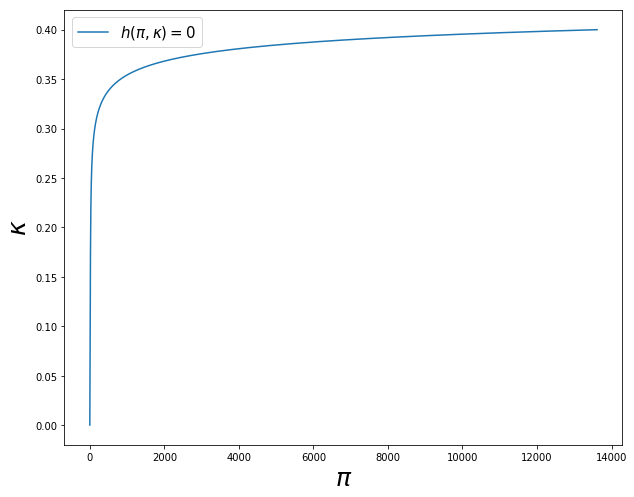

In [223]:
plt.figure(figsize=(10,8))
plt.plot(pil[1000:1800], kl[1000:1800], label=r"$h(\pi, \kappa)=0$")
plt.xlabel(r"$\pi$", fontsize=25)
plt.ylabel(r"$\kappa$", fontsize=25)
plt.legend(loc="best", fontsize=15)
#plt.savefig("h0.pdf", bbox_inches="tight")
plt.show()

In [229]:
all_params

{'C': 5.0,
 'M': 5.0,
 'alph': 0.5,
 'beta': 10,
 'c': 2,
 'eta': 7.0,
 'exp_lam': 2,
 'ff': 'Gamma',
 'gam_al': 2,
 'gam_bet': 2,
 'lamb': 8.0,
 'mu': 0.09,
 'p': 5,
 'par_al': 2,
 'par_xm': 2,
 'rho': 0.4,
 'sig': 0.3,
 'wei_k': 5,
 'wei_lam': 1}

# Gráficas conjuntas
---
# PARA RHO POSITIVO

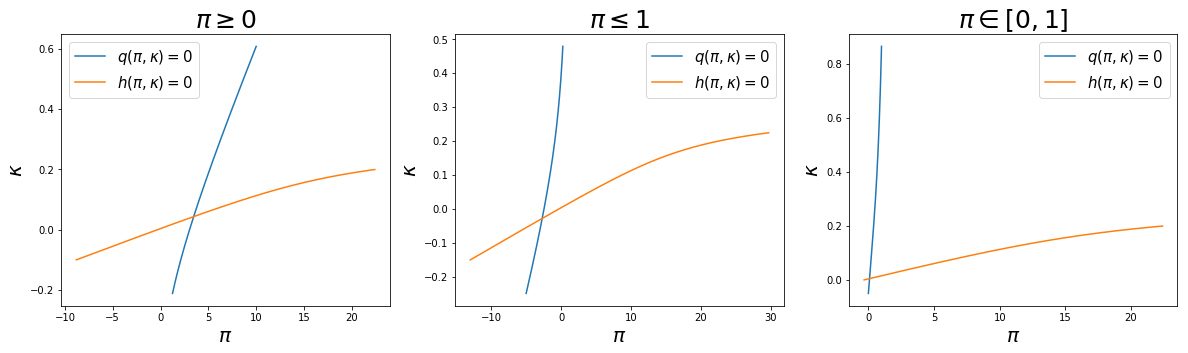

In [228]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(p_lvl1[250:2000], k_lvl1[250:2000], label=r"$q(\pi, \kappa)=0$")
plt.plot(pil[800:1400], kl[800:1400], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \geq 0$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

plt.subplot(132)
plt.plot(p_lvl2[0:1750], k_lvl2[0:1750], label=r"$q(\pi, \kappa)=0$")
plt.plot(pil[700:1450], kl[700:1450], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \leq 1$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

plt.subplot(133)
plt.plot(p_lvl3[0:2000], k_lvl3[0:2000], label=r"$q(\pi, \kappa)=0$ ")
plt.plot(pil[1000:1400], kl[1000:1400], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \in [0, 1]$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

#plt.savefig("FIG1.pdf", bbox_inches="tight")
plt.show()

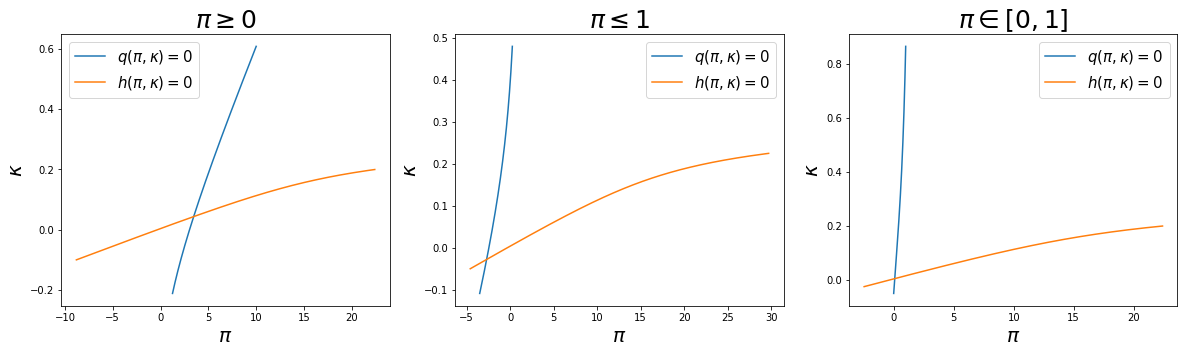

In [224]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(p_lvl1[250:2000], k_lvl1[250:2000], label=r"$q(\pi, \kappa)=0$")
plt.plot(pil[800:1400], kl[800:1400], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \geq 0$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

plt.subplot(132)
plt.plot(p_lvl2[500:1750], k_lvl2[500:1750], label=r"$q(\pi, \kappa)=0$")
plt.plot(pil[900:1450], kl[900:1450], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \leq 1$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

plt.subplot(133)
plt.plot(p_lvl3[0:2000], k_lvl3[0:2000], label=r"$q(\pi, \kappa)=0$ ")
plt.plot(pil[950:1400], kl[950:1400], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \in [0, 1]$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

#plt.savefig("FIGtest.pdf", bbox_inches="tight")
plt.show()

# Gráficas para rho negativo

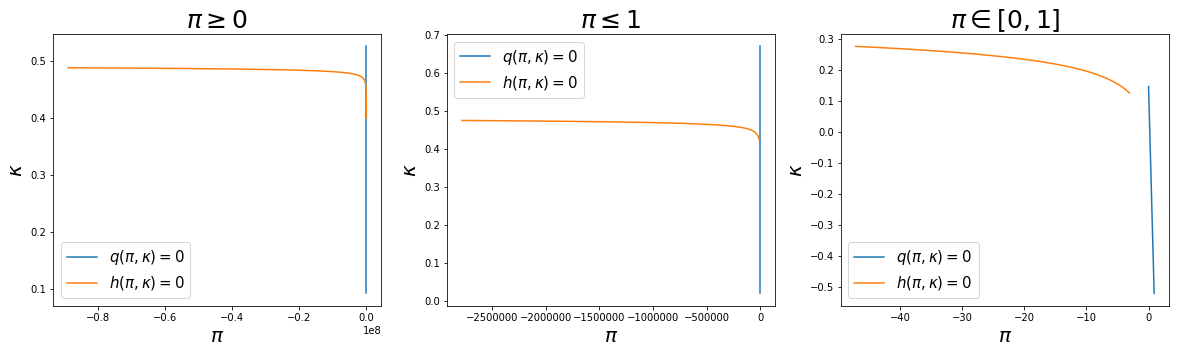

In [187]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(p_lvl1[80:200], k_lvl1[80:200], label=r"$q(\pi, \kappa)=0$")
plt.plot(pil[1600:1950], kl[1600:1950], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \geq 0$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

plt.subplot(132)
plt.plot(p_lvl2[1300:1600], k_lvl2[1300:1600], label=r"$q(\pi, \kappa)=0$")
plt.plot(pil[1700:1900], kl[1700:1900], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \leq 1$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

plt.subplot(133)
plt.plot(p_lvl3[0:1800], k_lvl3[0:1800], label=r"$q(\pi, \kappa)=0$ ")
plt.plot(pil[500:1100], kl[500:1100], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \in [0, 1]$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

#plt.savefig("all_gammadist_eta8_rho_-05.pdf", bbox_inches="tight")
plt.show()

## Intersección

In [126]:
def find_inter(x1, x2, y1, y2):
    '''x_int = np.argmin(np.abs(x2-x1))
    y_int = np.argmin(np.abs(y2-y1))'''
    
    d_sq = ((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1))**2
    
    #return x_int, y_int
    return np.argmin(d_sq)

In [127]:
'''idxx, idxy = find_inter(pil, p_lvl1, kl, k_lvl1)
idxx, idxy'''
idxx = find_inter(pil, p_lvl1, kl, k_lvl1)
idxx

416

In [78]:
# Caso 1

idx = np.argwhere(np.diff(np.sign(p_lvl1 - pil))).flatten()
print(p_lvl1[idx], kl[idx], idx)

idx = np.argwhere(np.diff(np.sign(k_lvl1 - kl))).flatten()
print(p_lvl1[idx], kl[idx], idx)

# Caso 2



# Caso 3

idx = np.argwhere(np.diff(np.sign(p_lvl3 - pil))).flatten()
#print(p_lvl3[idx], kl[idx])

[4.68984492] [0.15632816] [1875]
[0.78289145] [0.02609638] [313]


In [71]:
idx

array([729])

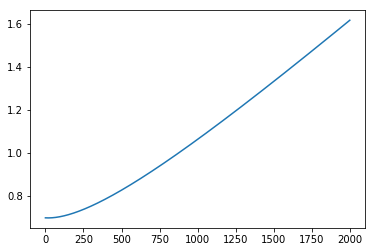

In [116]:
plt.plot(p_lvl1 - k_lvl1)
plt.show()

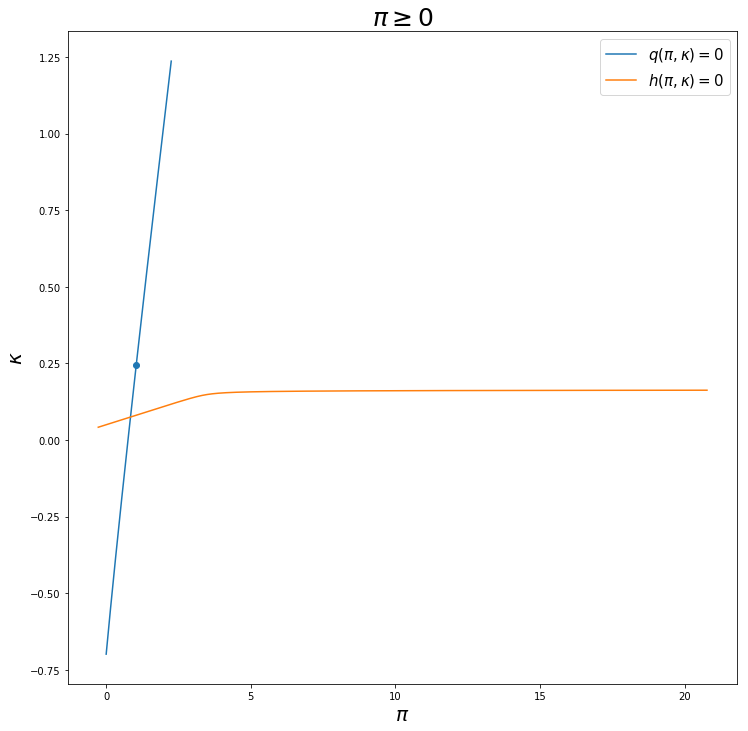

In [128]:
plt.figure(figsize=(12,12))

plt.plot(p_lvl1[0:900], k_lvl1[0:900], label=r"$q(\pi, \kappa)=0$")
plt.plot(pil[500:1950], kl[500:1950], label=r"$h(\pi, \kappa)=0$")

plt.title(r"$\pi \geq 0$", fontsize=25)
plt.xlabel(r"$\pi$", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.legend(loc="best", fontsize=15)

plt.scatter(p_lvl1[416], k_lvl1[416])#k_lvl1[337])

plt.show()